# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('new_train.csv')
print(df.shape)
df.head()

(32950, 16)


age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [3]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

# Data Exploration and Preparation

## Univariate Analysis

### Continuous Variables

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_variables = list(df.select_dtypes(include=numerics).columns)
print(num_variables)

['age', 'duration', 'campaign', 'pdays', 'previous']


In [5]:
def continuous_explore(df,col,target,hue=True,solo=True,scatter=True,line=True,strip=True,
                swarm=False,histogram=True,density=True,box=True,violin=True,cdf=True):
    """
    In case of continuous variables, we need to understand the central tendency and 
    spread of the variable.
    
    1. Scatter Plot: This plots different observations/values of the same variable 
    corresponding to the index/observation number.

    2. Line Plot: A line plot visualizes data by connecting the data points via line 
    segments. It is similar to a scatter plot except that the measurement points 
    are ordered (typically by their x-axis value) and joined with straight 
    line segments (For Time-Series)
    
    3. Strip Plot: The strip plot is similar to a scatter plot. It is often used 
    along with other kinds of plots for better analysis. It is used to visualize 
    the distribution of data points of the variable.
    
    4. Swarm Plot: The swarm-plot, similar to a strip-plot, provides a visualization
    technique for univariate data to view the spread of values in a continuous 
    variable. The only difference between the strip-plot and the swarm-plot is that
    the swarm-plot spreads out the data points of the variable automatically to 
    avoid overlap and hence provides a better visual overview of the data.
    
    5. Histogram: Histograms are similar to bar charts which display the counts or
    relative frequencies of values falling in different class intervals or ranges.
    A histogram displays the shape and spread of continuous sample data. It also 
    helps us understand the skewness and kurtosis of the distribution of the data.
    
    6. Density Plot: A density plot is like a smoother version of a histogram. 
    Generally, the kernel density estimate is used in density plots to show the 
    probability density function of the variable. A continuous curve, which is the 
    kernel is drawn to generate a smooth density estimation for the whole data.
    
    7. Box Plot: A box-plot is a very useful and standardized way of displaying the 
    distribution of data based on a five-number summary (minimum, first quartile, 
    second quartile(median), third quartile, maximum). It helps in understanding 
    these parameters of the distribution of data and is extremely helpful in 
    detecting outliers.
    
    8. Violin Plot: The Violin plot is very much similar to a box plot, with the 
    addition of a rotated kernel density plot on each side. It shows the distribution
    of quantitative data across several levels of one (or more) categorical variables
    such that those distributions can be compared.
    
    9. Cumulative Distributive Function
    
    """
    
    print(df[col].describe())
    
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    
    # Scatter Plot
    if scatter == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.scatter(df.index,df[col])        
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Scatter Plot",fontdict = font1)
        plt.tight_layout()
        plt.show()
    
    # Scatter Plot With Hue
    if scatter == True and hue == True:
        plt.figure(figsize=(15,8))
        g = sns.scatterplot(x=df.index,y=df[col],hue=df[target])
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Scatter Plot",fontdict = font1)
        plt.tight_layout()
        plt.show()
    
    # Line Plot
    if line == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Line Plot",fontdict = font1)
        plt.plot(df.index,df[col],markevery=1,marker='d')
        plt.tight_layout()
        plt.show()
    
    # Line Plot With Hue
    if line == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Line Plot",fontdict = font1)
        g = sns.lineplot(x=df.index,y=df[col],hue=df[target],markevery=1,marker='d')
        plt.tight_layout()
        plt.show()
    
    # Strip Plot
    if strip == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Strip Plot",fontdict = font1)
        g = sns.stripplot(y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Strip Plot With Hue
    if strip == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Strip Plot",fontdict = font1)
        g = sns.stripplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Swarm Plot
    if swarm == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Swarm Plot",fontdict = font1)
        g = sns.swarmplot(x=df[col])
        plt.tight_layout()
        plt.show()
    
    # Swarm Plot With Hue
    if swarm == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Swarm Plot",fontdict = font1)
        g = sns.swarmplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Histogram
    if histogram == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("count",fontdict = font2)
        plt.title("Histogram",fontdict = font1)
        g = sns.histplot(x=df[col],kde=False,color='black',bins=10)
        plt.tight_layout()
        plt.show()
        
    # Density Plot
    if density == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("density",fontdict = font2)
        plt.title("Density Plot",fontdict = font1)
        g = sns.kdeplot(x=df[col],shade=True)
        plt.tight_layout()
        plt.show()
    
    # Box Plot
    if box == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Box Plot",fontdict = font1)
        g = sns.boxplot(y=df[col])
        plt.tight_layout()
        plt.show()
        
    # Box Plot
    if box == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Box Plot",fontdict = font1)
        g = sns.boxplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
        
    # Violin Plot
    if violin == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Violin Plot",fontdict = font1)
        g = sns.violinplot(y=df[col],orient='v')
        plt.tight_layout()
        plt.show()
        
    # Violin Plot Hue
    if violin == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("Scale",fontdict = font2)
        plt.title("Violin Plot",fontdict = font1)
        g = sns.violinplot(x=df[target],y=df[col],orient='v')
        plt.tight_layout()
        plt.show()
        
    # Cumulative Distributive Function
    if cdf == True:
        counts,bin_edges = np.histogram(df[col],bins=10,density=True)
        plt.xlabel(f"{col}",fontdict = font2)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        print(f'pdf = {pdf}')
        print(f'cdf = {cdf}')
        print(f'bin edges = {bin_edges}')
        plt.plot(bin_edges[1:],pdf)
        plt.plot(bin_edges[1:],cdf)


age
count    32950.000000
mean        40.014112
std         10.403636
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


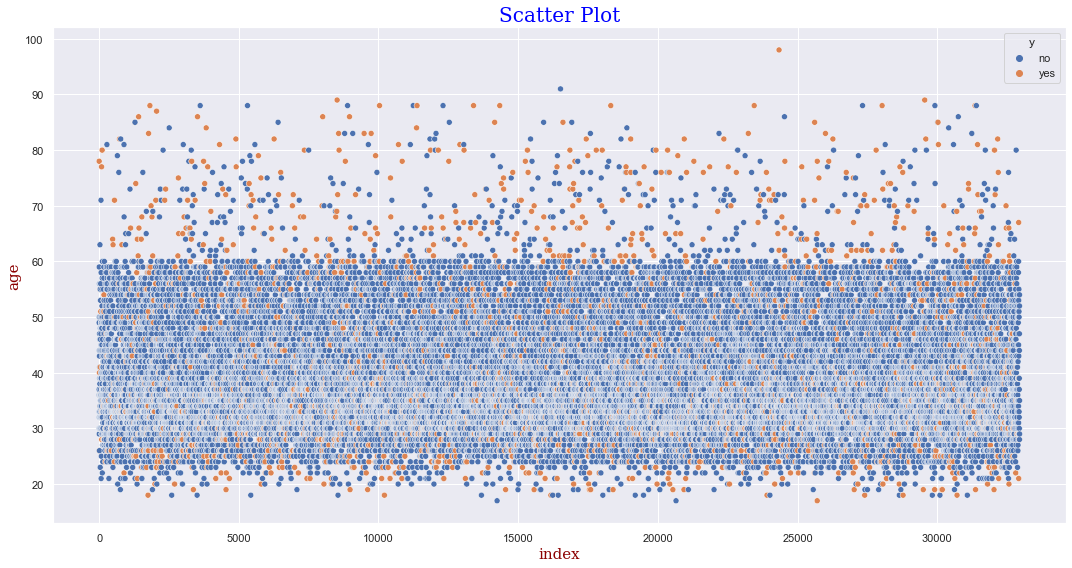

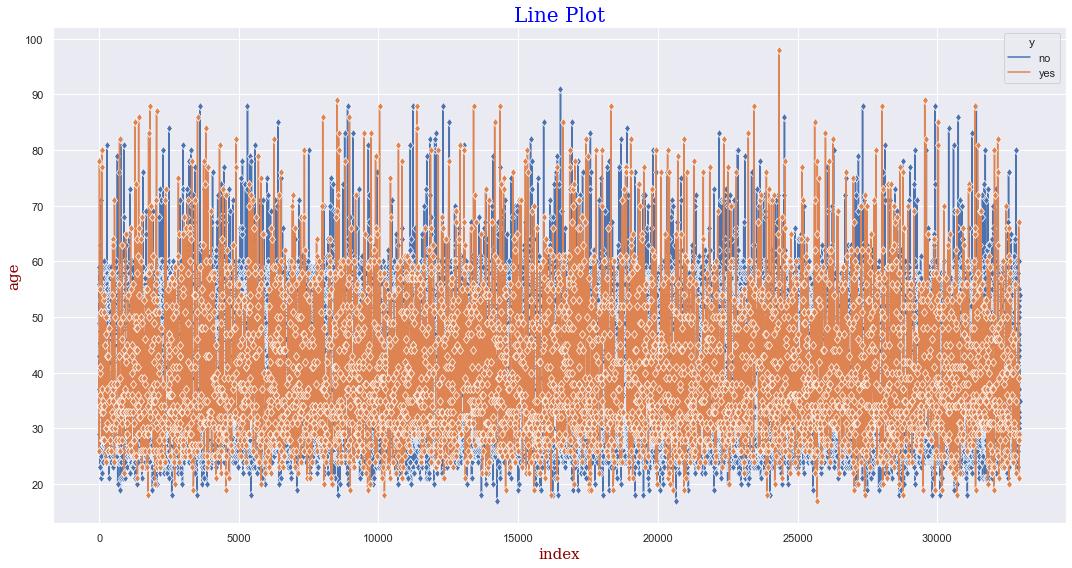

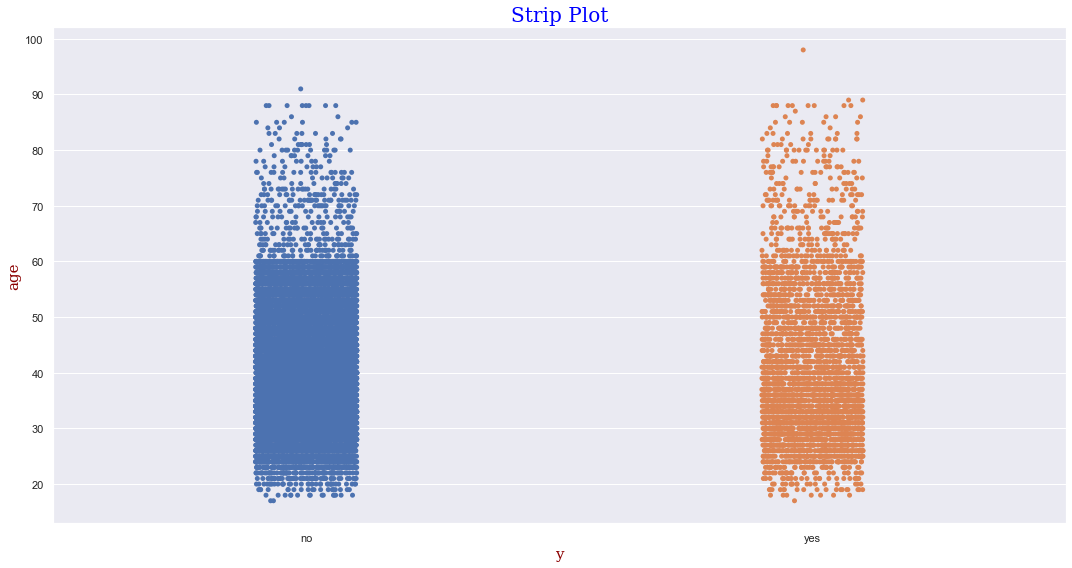

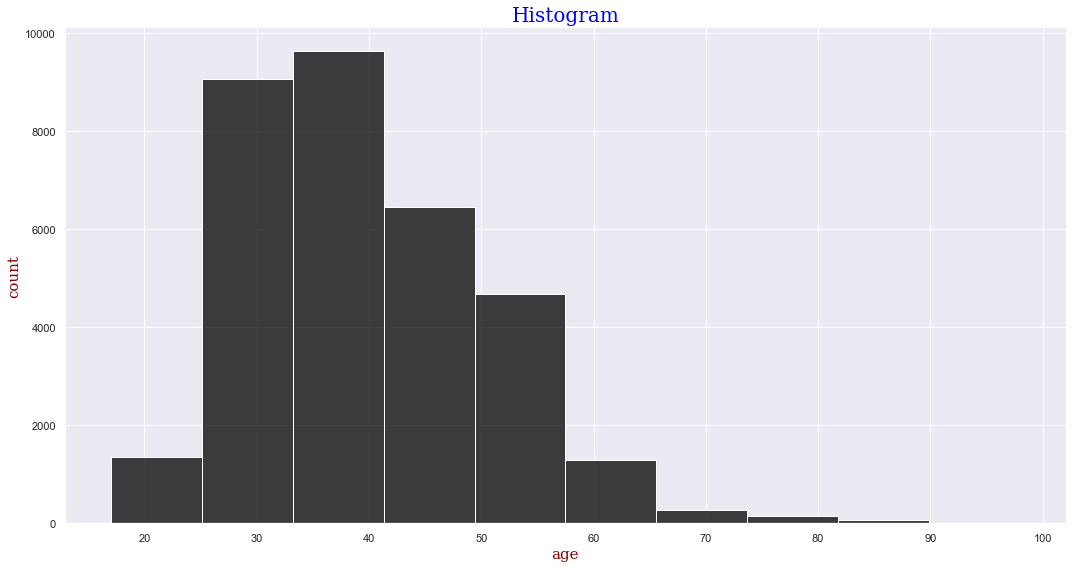

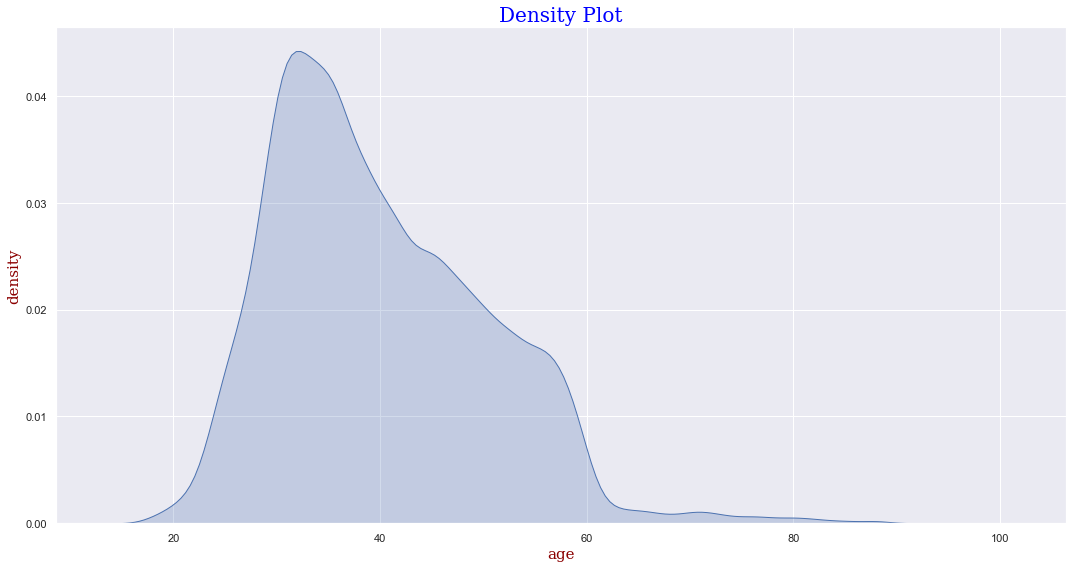

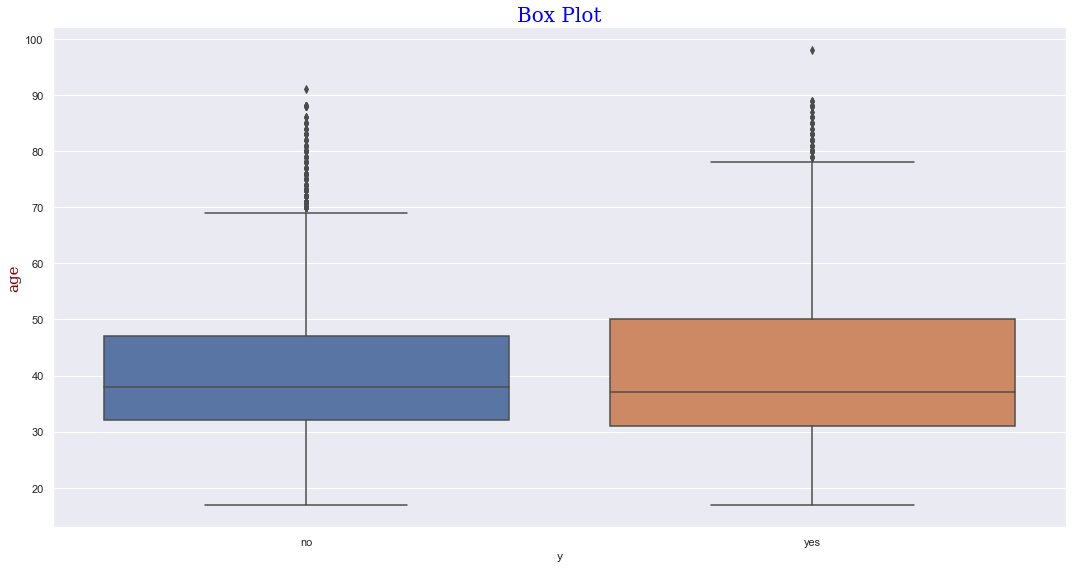

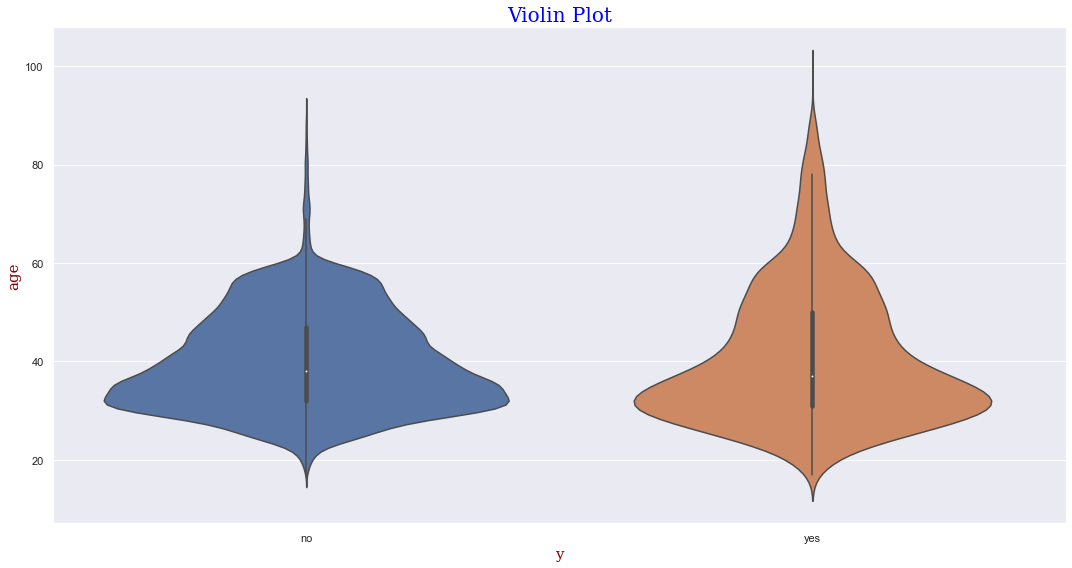

pdf = [4.08497724e-02 2.74992413e-01 2.92230653e-01 1.95872534e-01
 1.42094082e-01 3.90895296e-02 8.04248862e-03 4.67374810e-03
 2.09408194e-03 6.06980273e-05]
cdf = [0.04084977 0.31584219 0.60807284 0.80394537 0.94603945 0.98512898
 0.99317147 0.99784522 0.9999393  1.        ]
bin edges = [17.  25.1 33.2 41.3 49.4 57.5 65.6 73.7 81.8 89.9 98. ]



duration
count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


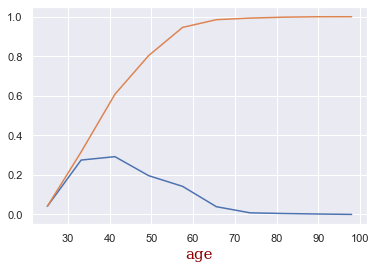

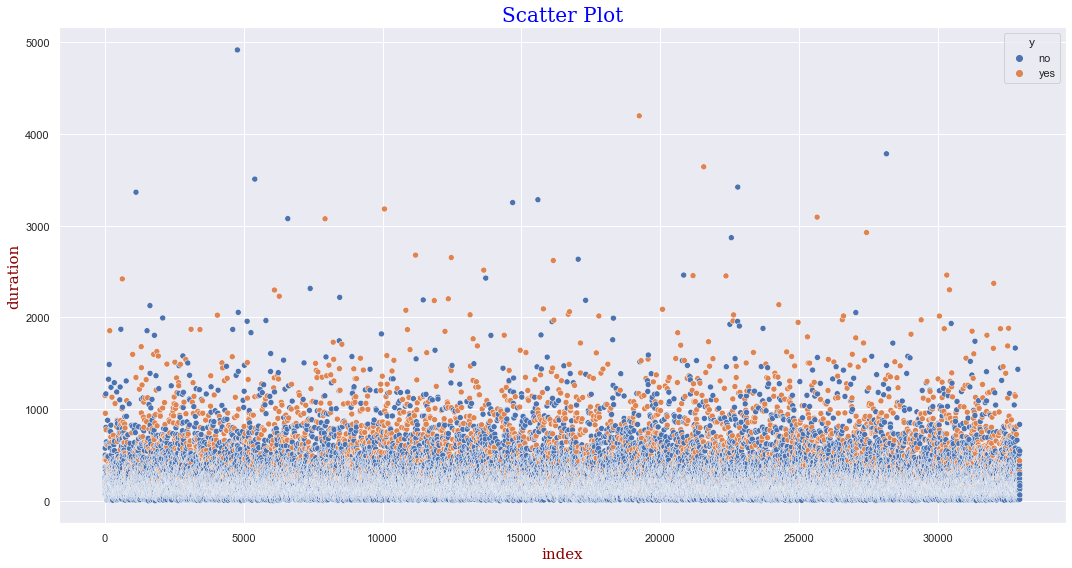

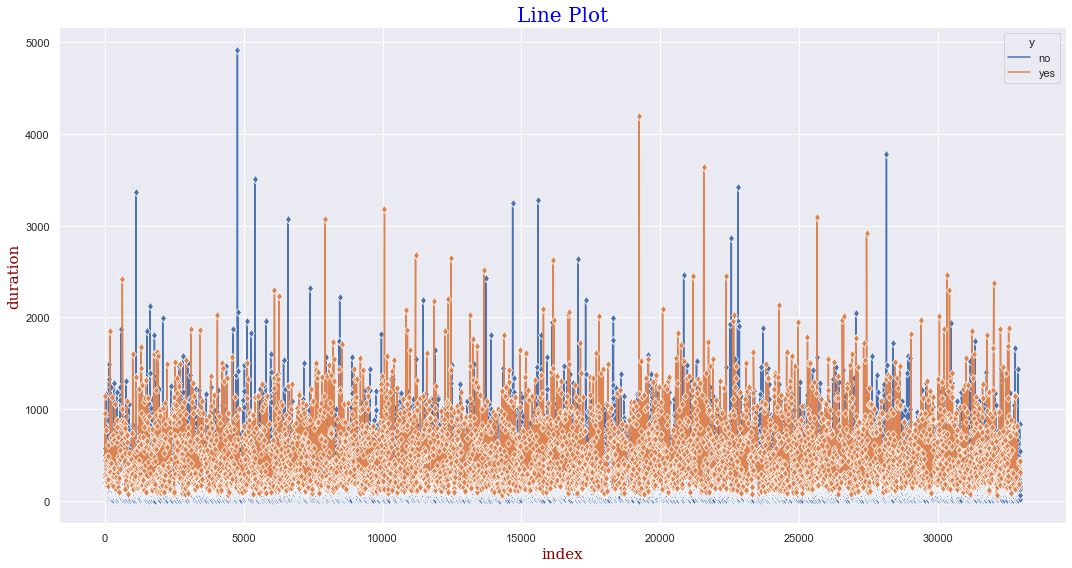

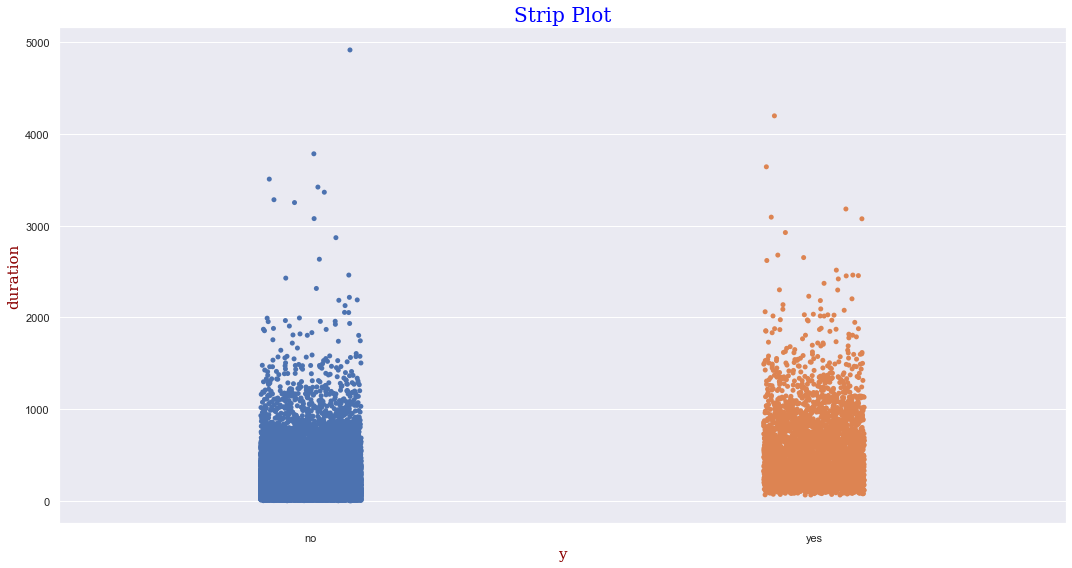

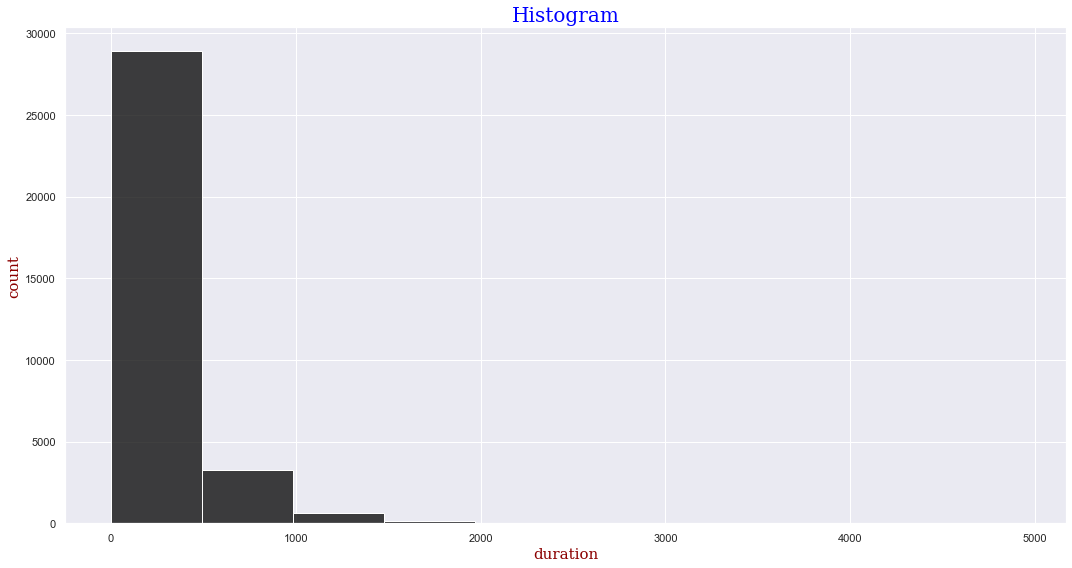

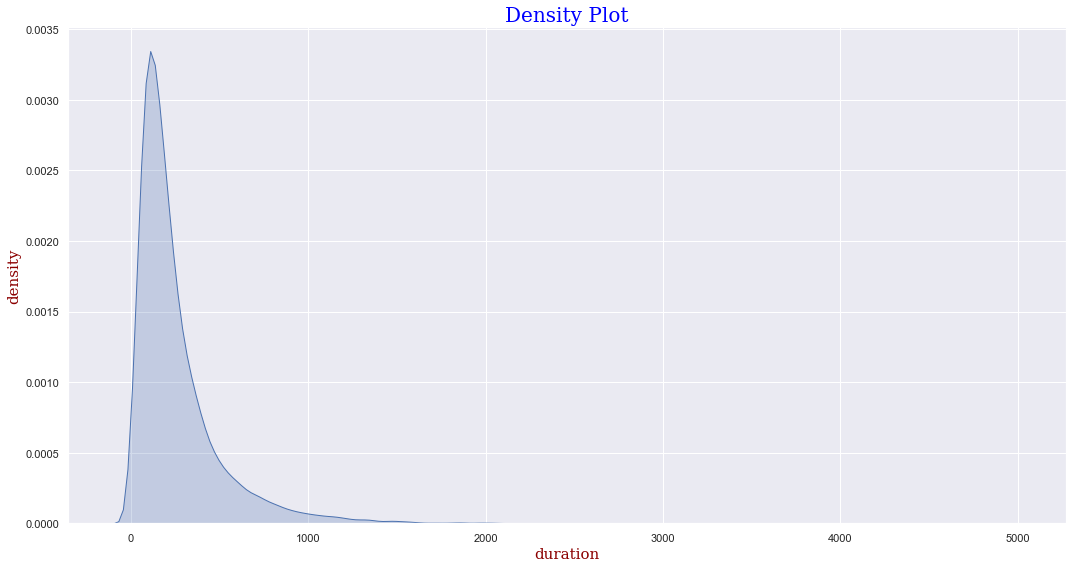

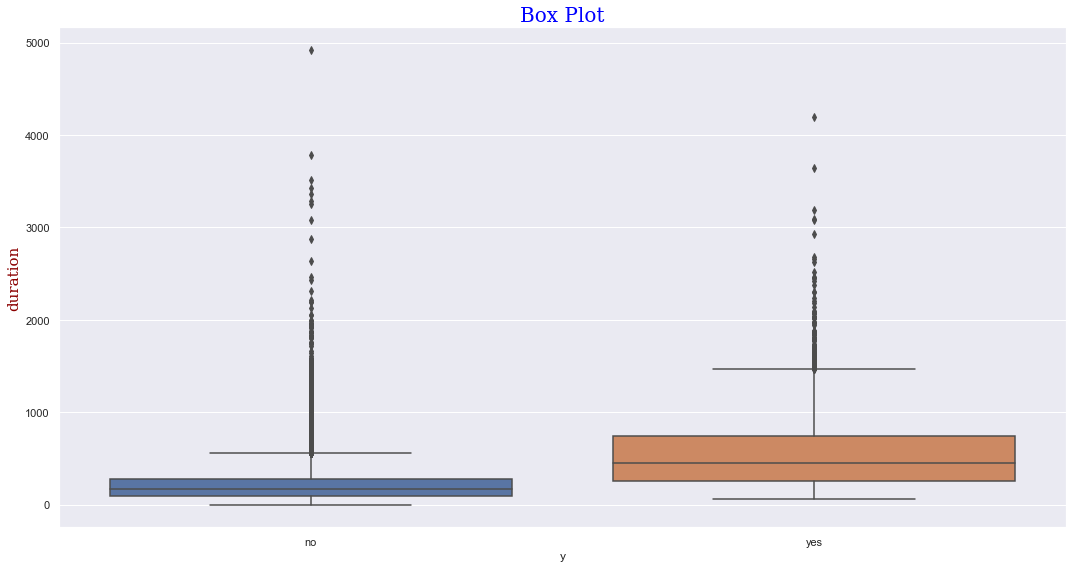

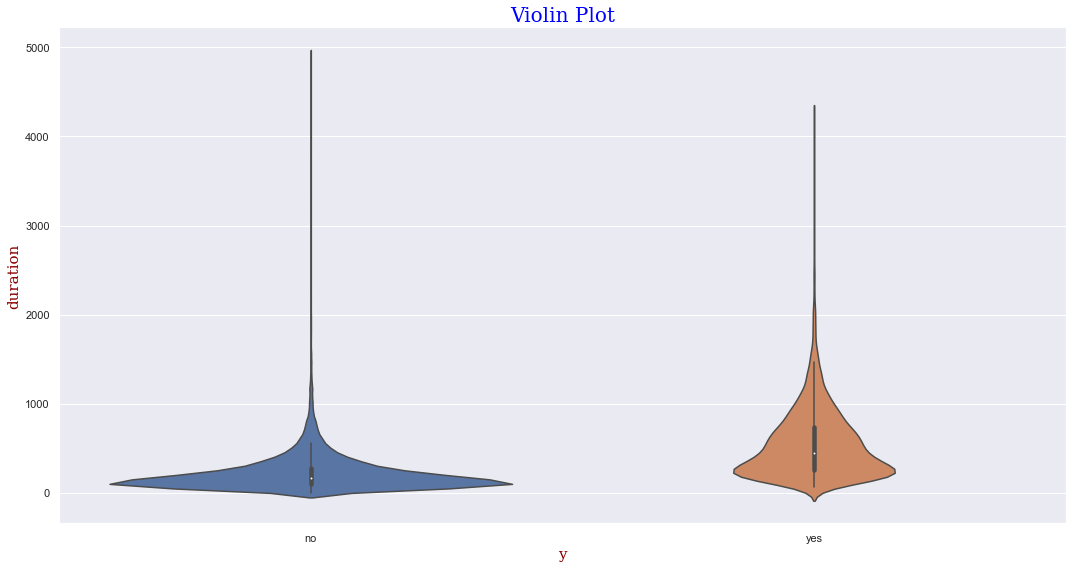

pdf = [8.77511381e-01 9.84522003e-02 1.87253414e-02 3.61153263e-03
 1.03186646e-03 2.73141123e-04 2.42792109e-04 9.10470410e-05
 3.03490137e-05 3.03490137e-05]
cdf = [0.87751138 0.97596358 0.99468892 0.99830046 0.99933232 0.99960546
 0.99984825 0.9999393  0.99996965 1.        ]
bin edges = [   0.   491.8  983.6 1475.4 1967.2 2459.  2950.8 3442.6 3934.4 4426.2
 4918. ]



campaign
count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


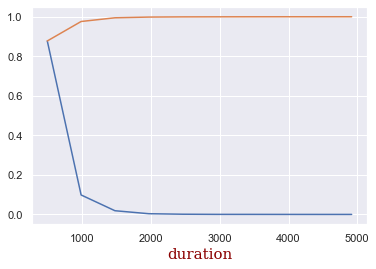

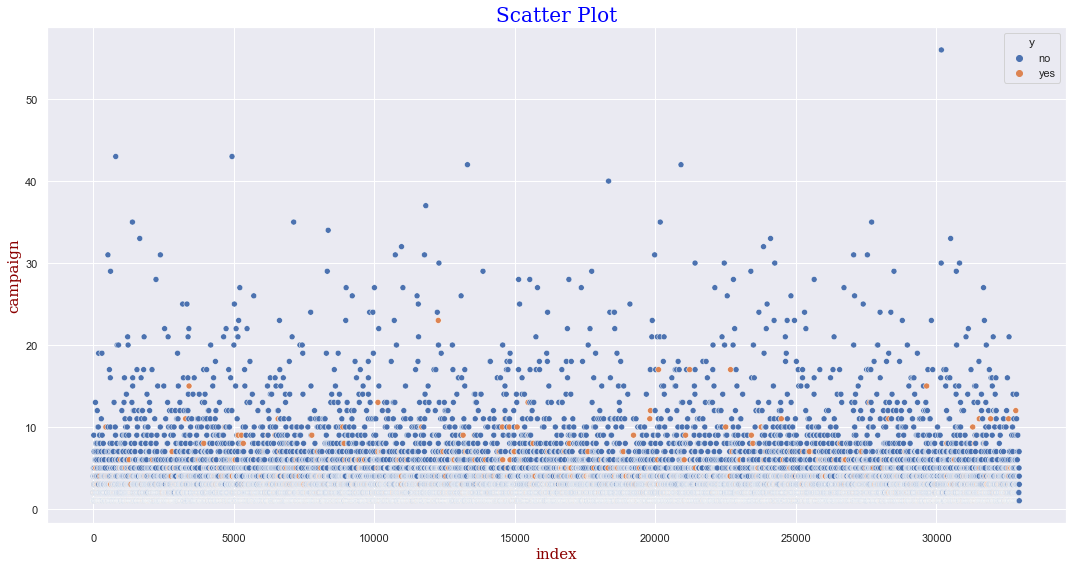

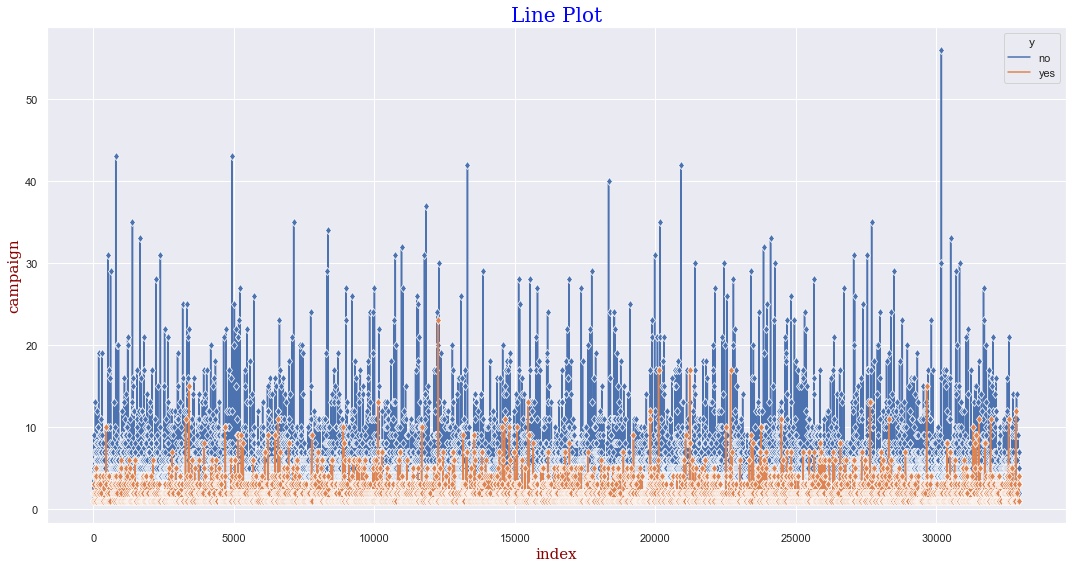

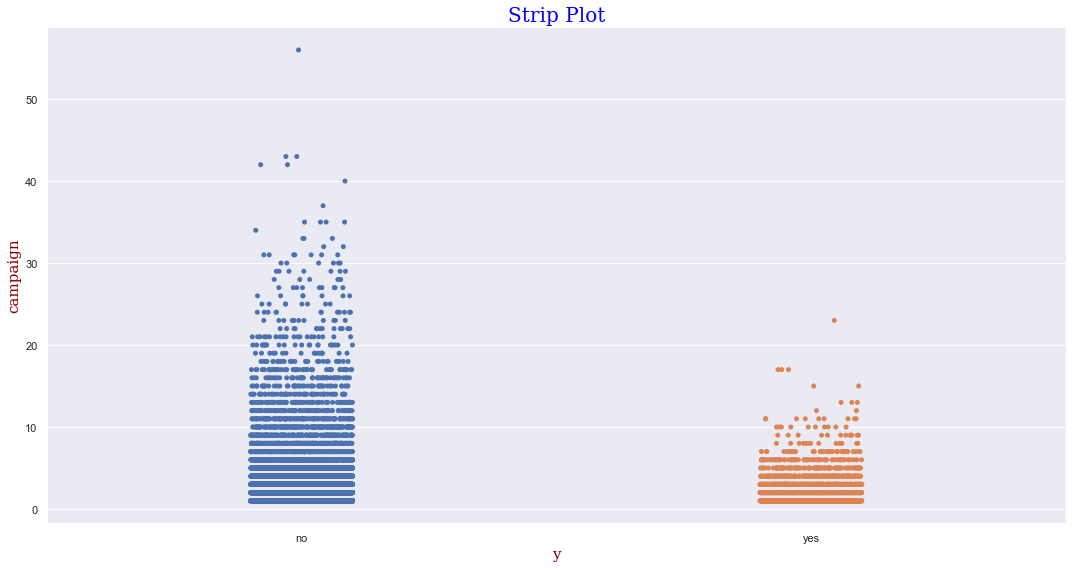

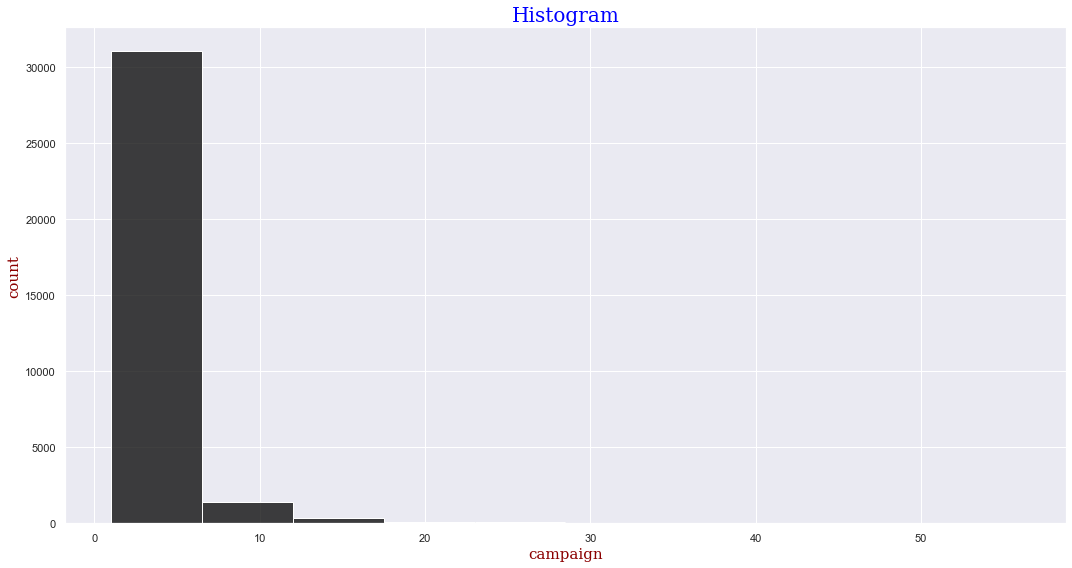

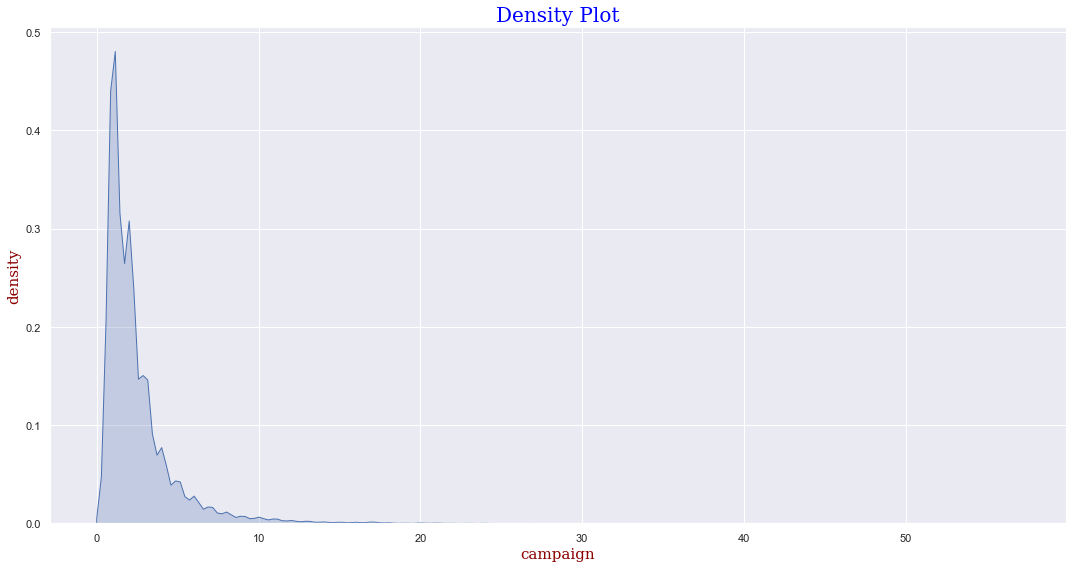

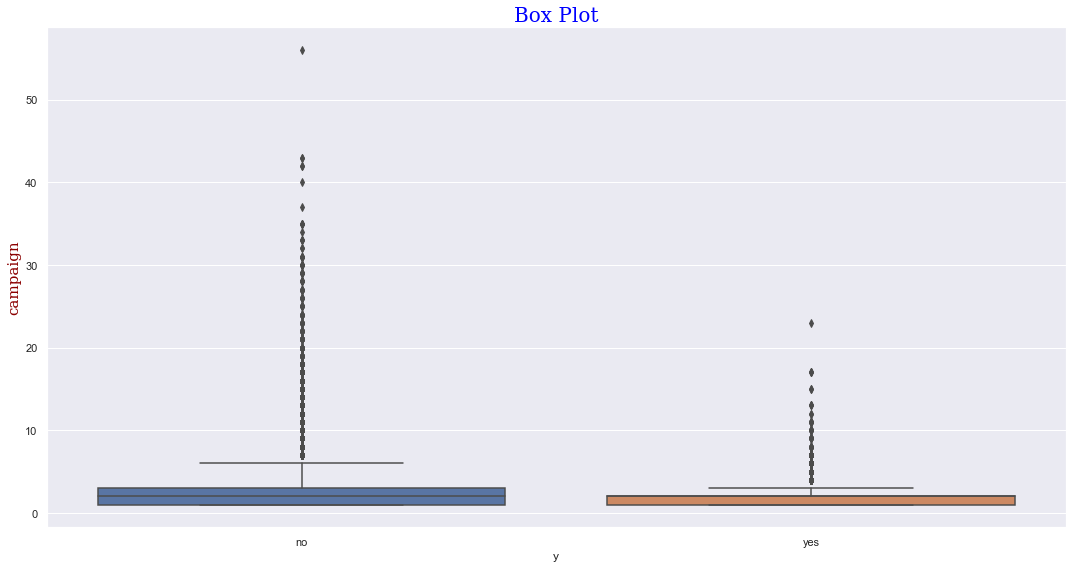

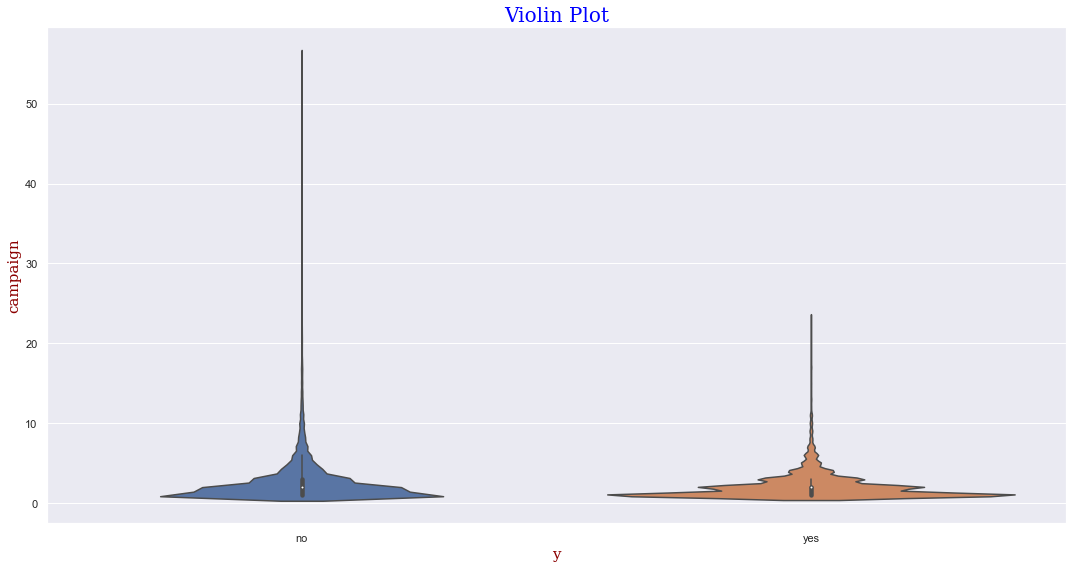

pdf = [9.41851290e-01 4.16084977e-02 1.08042489e-02 2.97420334e-03
 1.63884674e-03 7.58725341e-04 1.82094082e-04 1.51745068e-04
 0.00000000e+00 3.03490137e-05]
cdf = [0.94185129 0.98345979 0.99426404 0.99723824 0.99887709 0.99963581
 0.99981791 0.99996965 0.99996965 1.        ]
bin edges = [ 1.   6.5 12.  17.5 23.  28.5 34.  39.5 45.  50.5 56. ]



pdays
count    32950.000000
mean       962.052413
std        187.951096
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


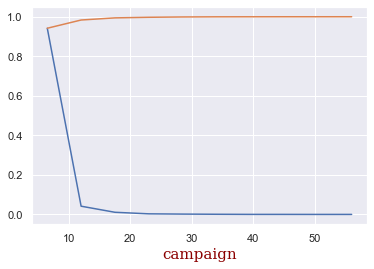

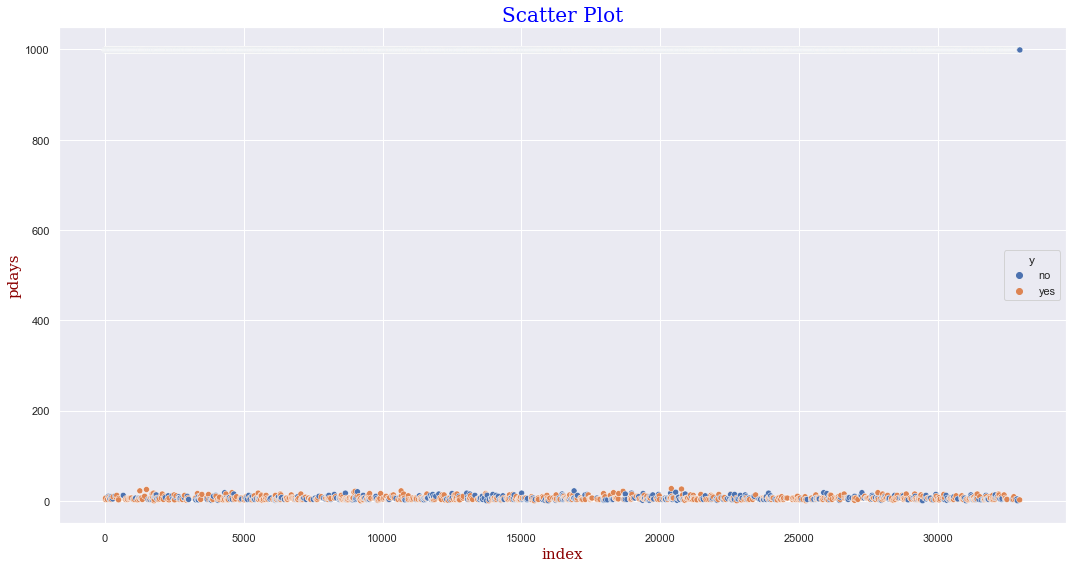

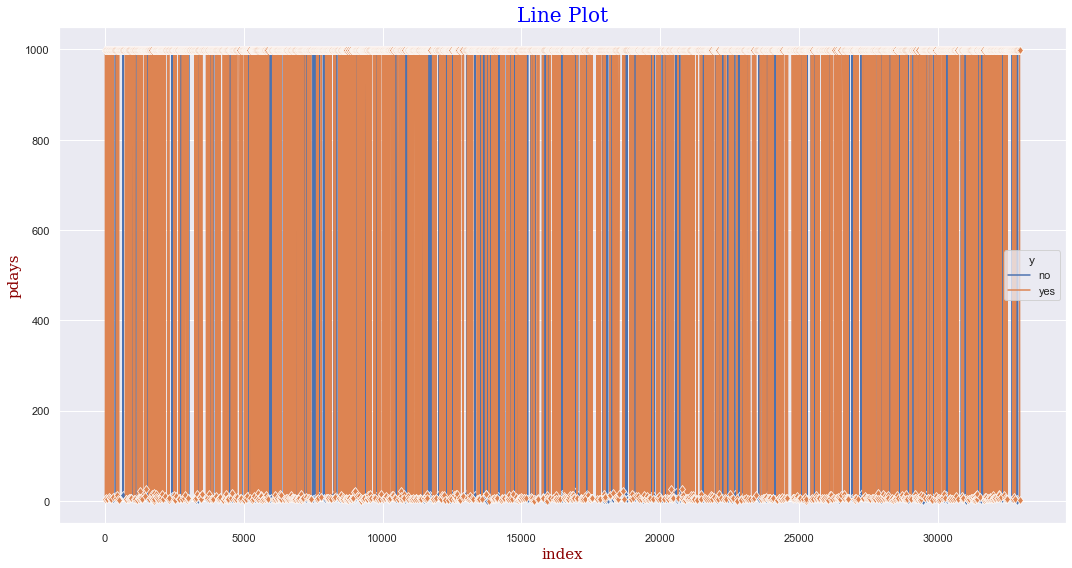

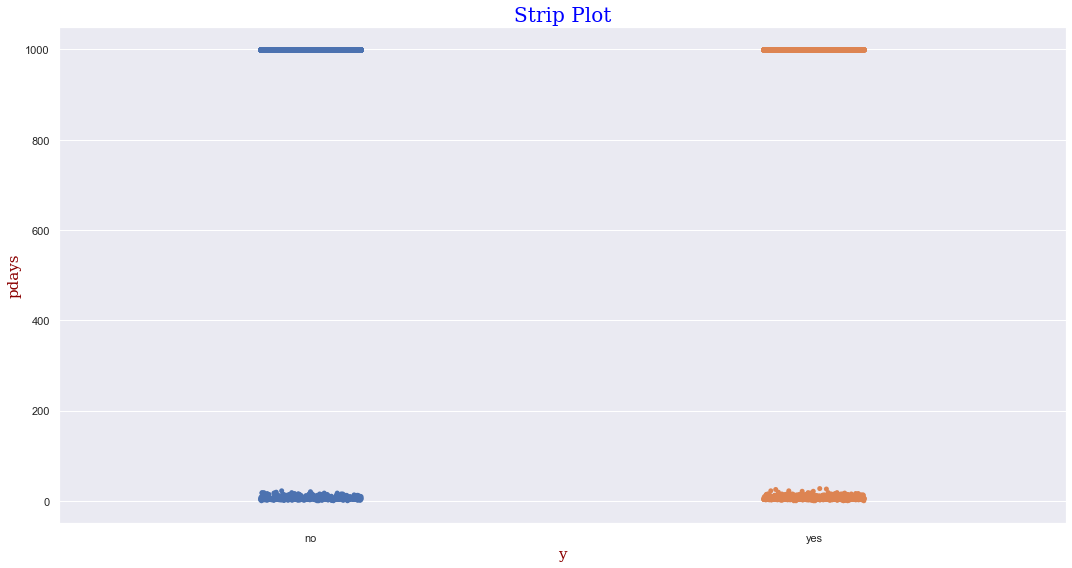

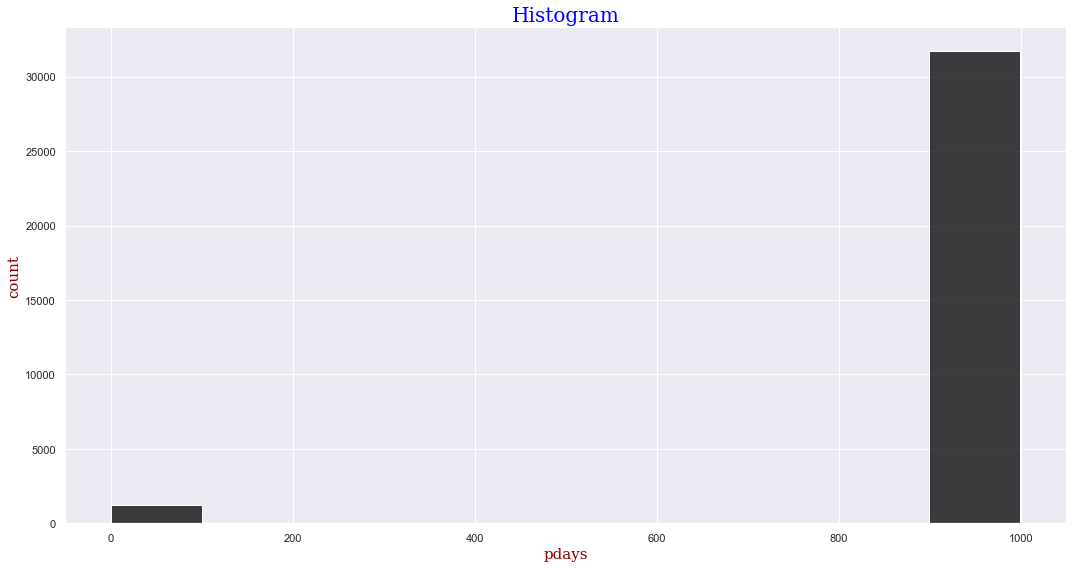

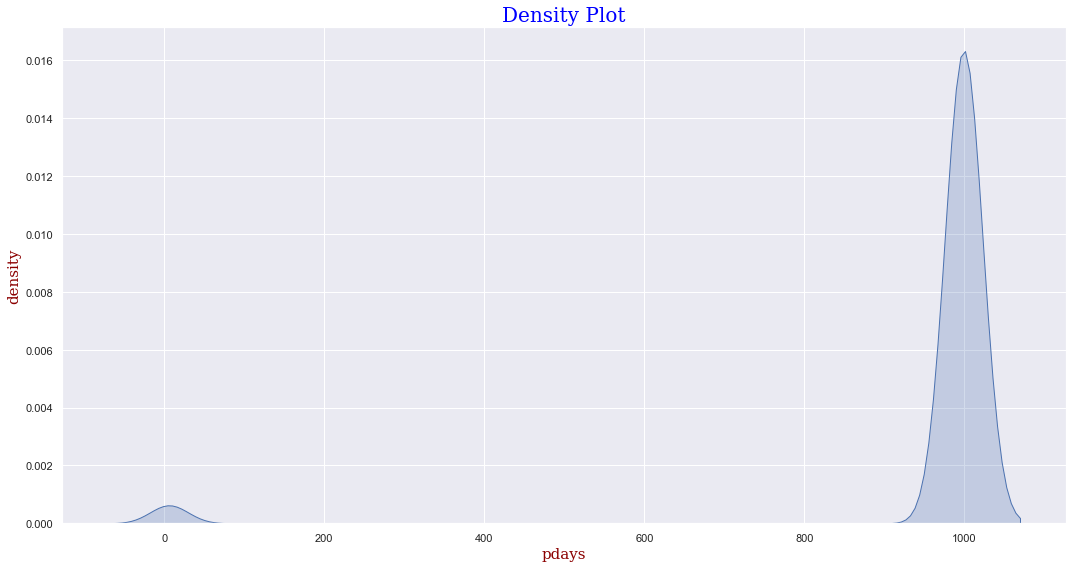

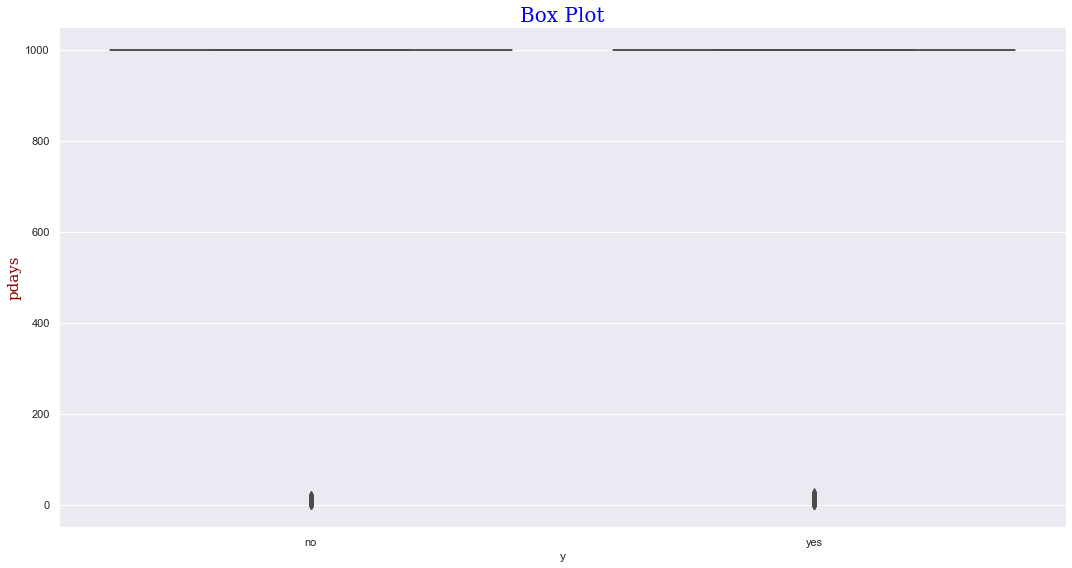

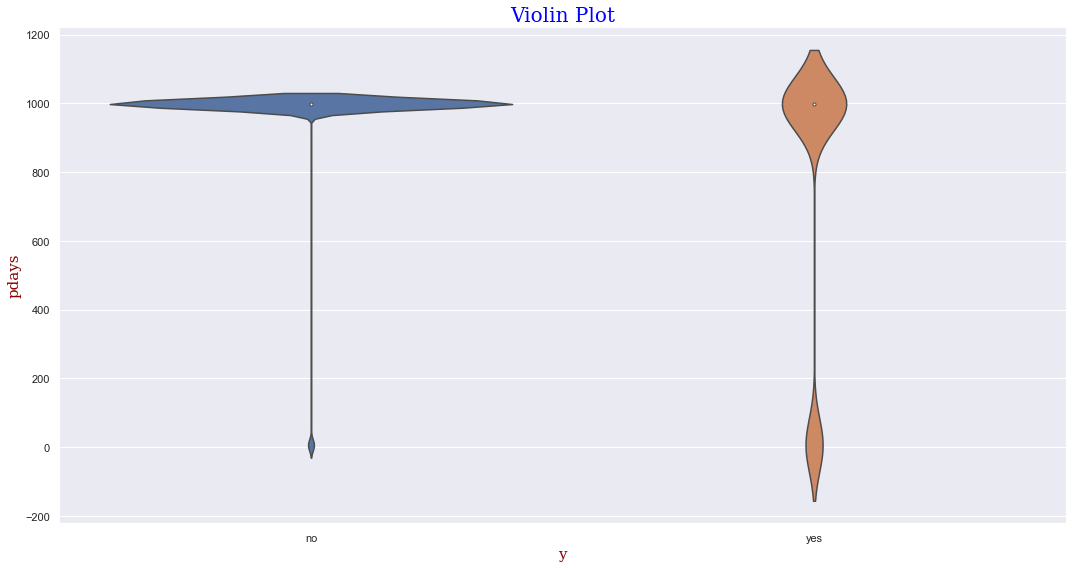

pdf = [0.03720789 0.         0.         0.         0.         0.
 0.         0.         0.         0.96279211]
cdf = [0.03720789 0.03720789 0.03720789 0.03720789 0.03720789 0.03720789
 0.03720789 0.03720789 0.03720789 1.        ]
bin edges = [  0.   99.9 199.8 299.7 399.6 499.5 599.4 699.3 799.2 899.1 999. ]



previous
count    32950.000000
mean         0.174719
std          0.499025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


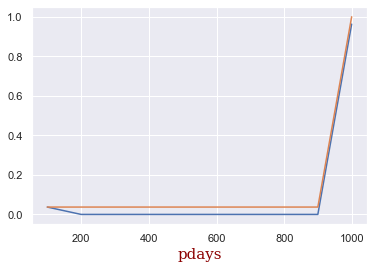

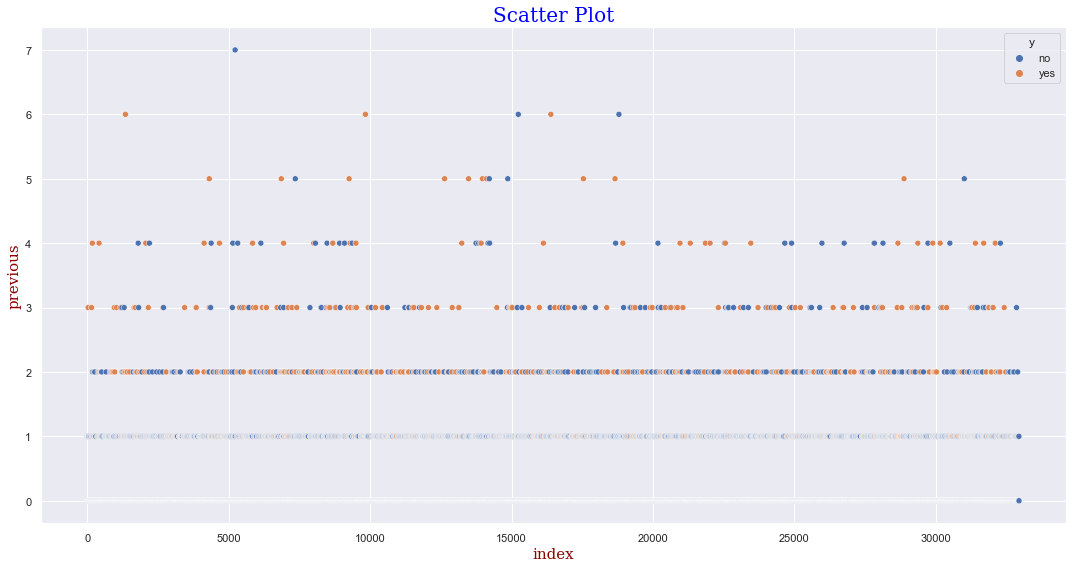

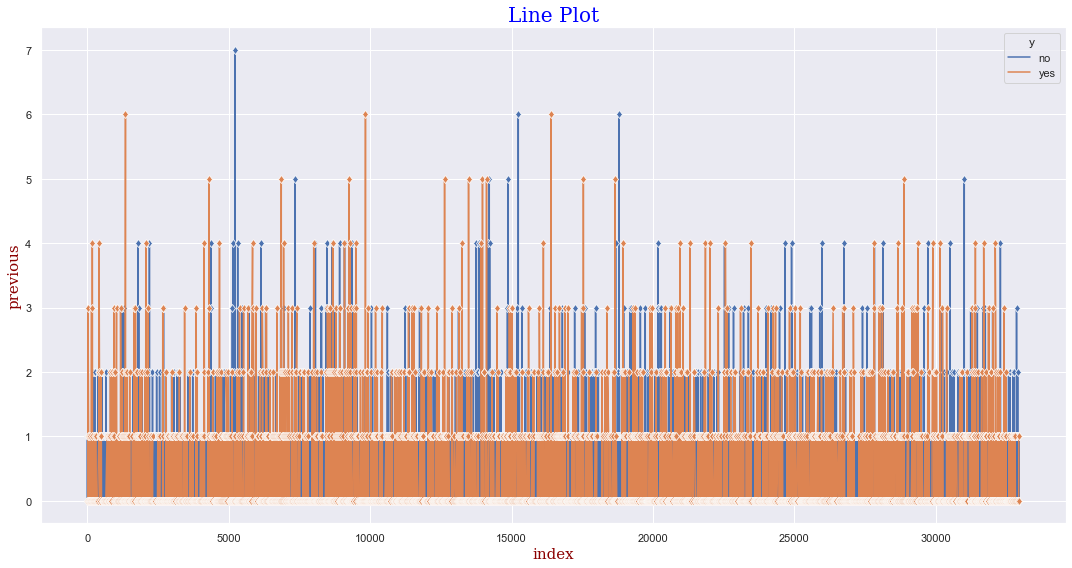

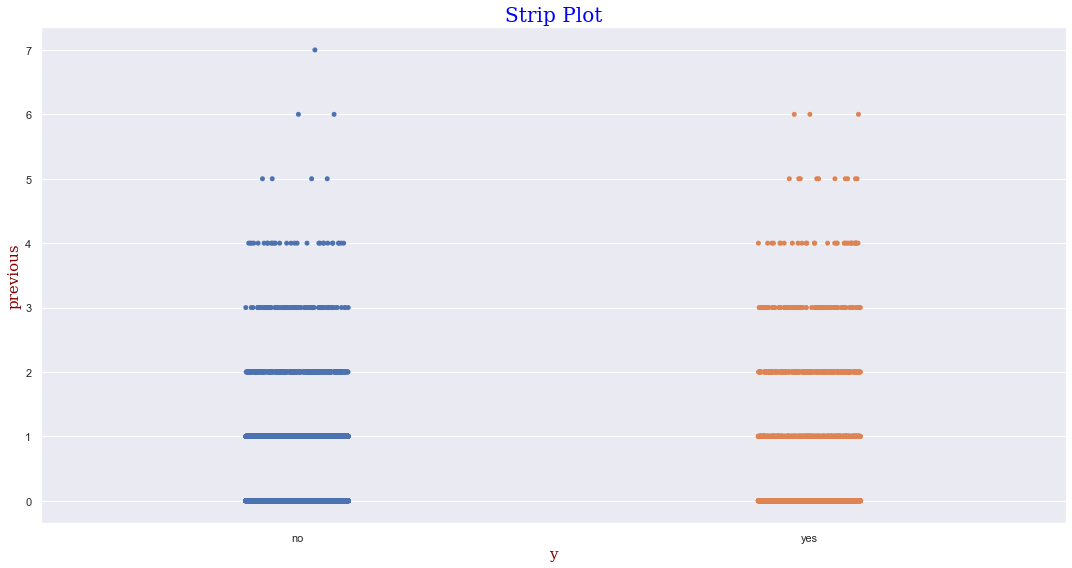

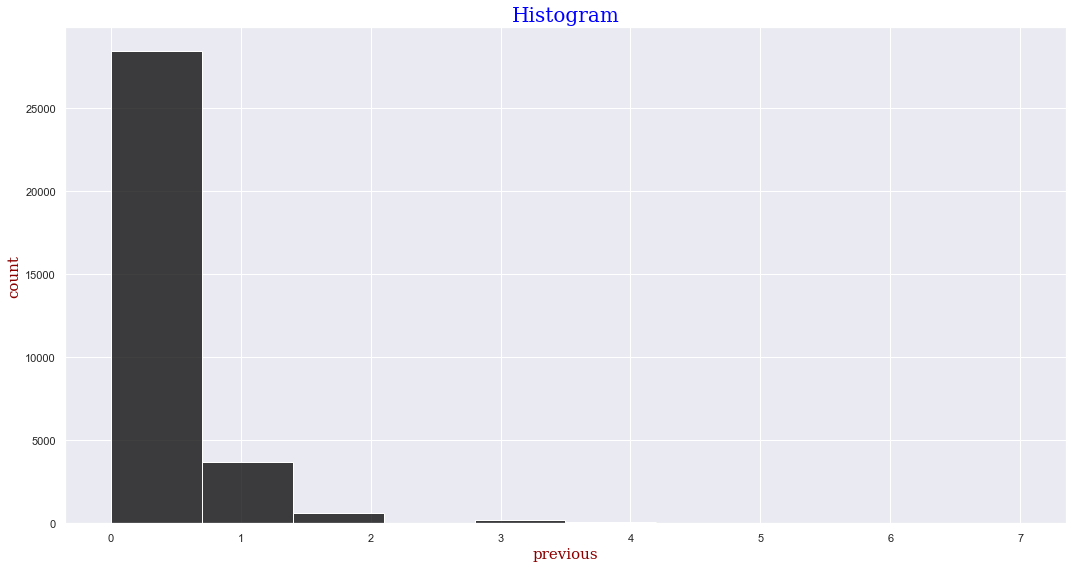

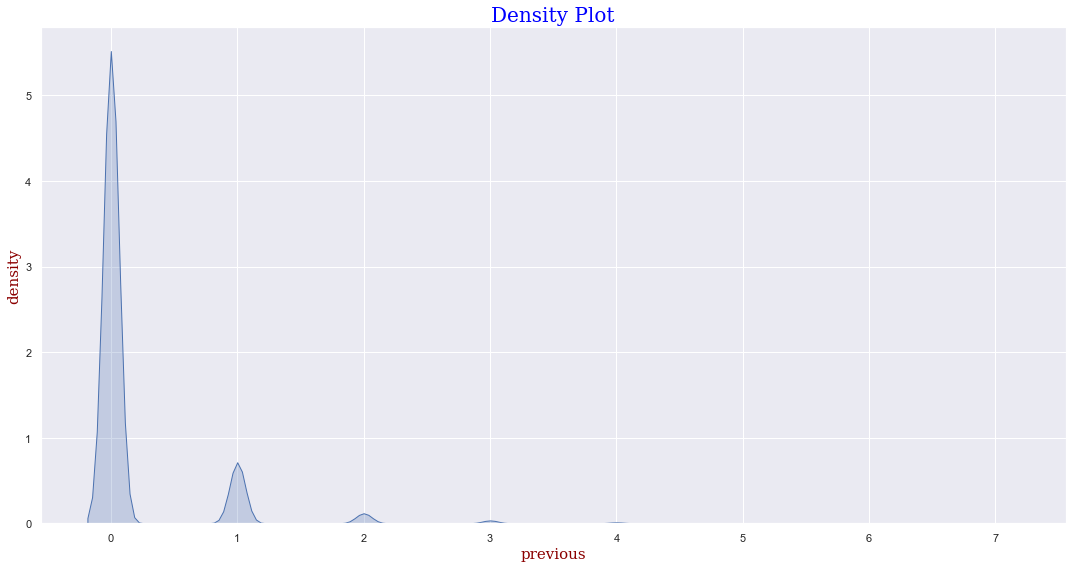

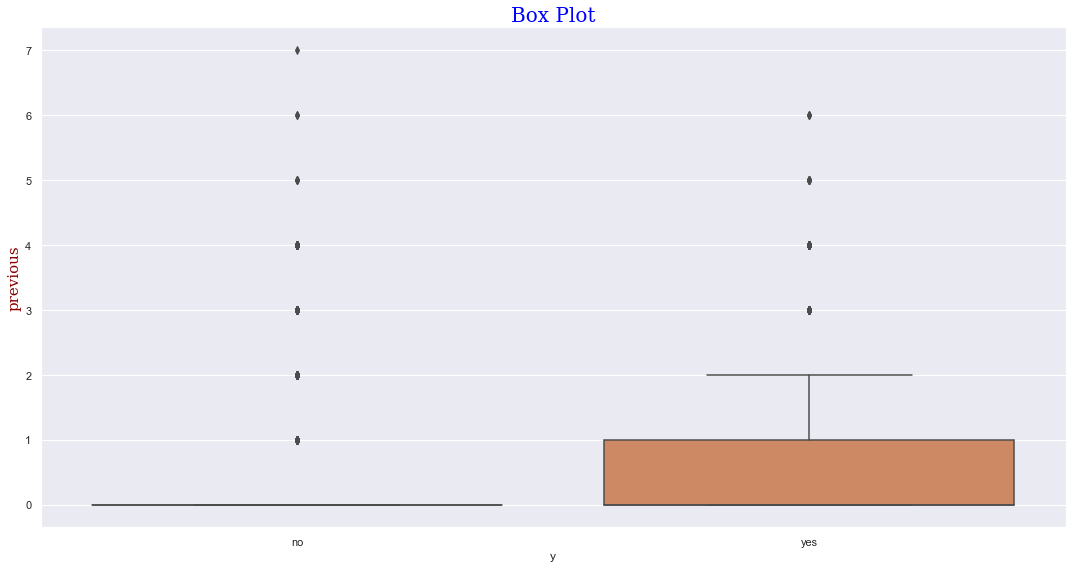

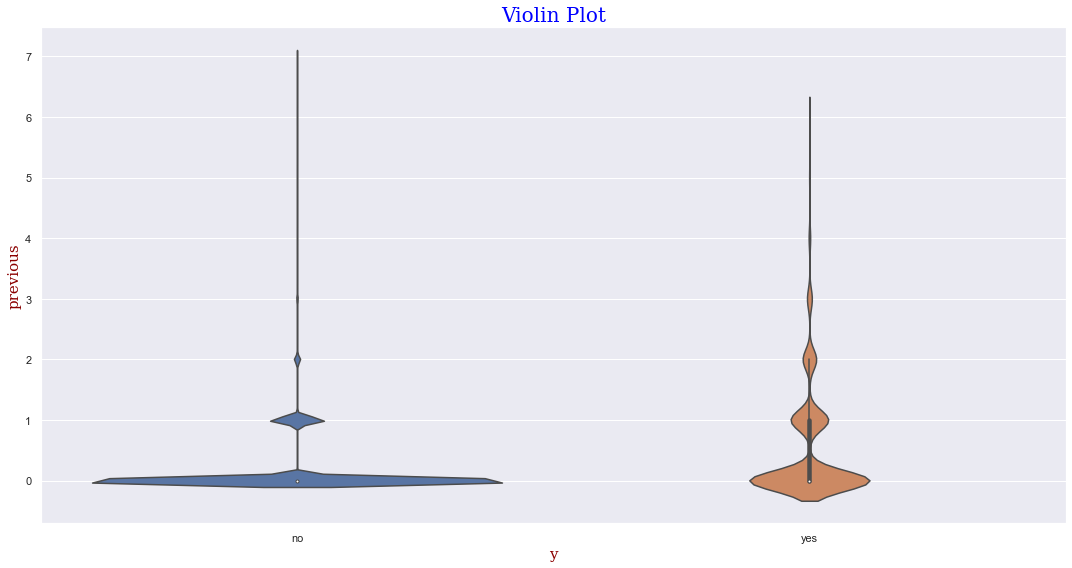

pdf = [8.62397572e-01 1.11471927e-01 1.83915023e-02 0.00000000e+00
 5.31107739e-03 1.82094082e-03 0.00000000e+00 4.24886191e-04
 1.51745068e-04 3.03490137e-05]
cdf = [0.86239757 0.9738695  0.992261   0.992261   0.99757208 0.99939302
 0.99939302 0.99981791 0.99996965 1.        ]
bin edges = [0.  0.7 1.4 2.1 2.8 3.5 4.2 4.9 5.6 6.3 7. ]





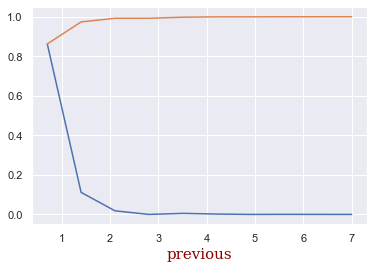

In [6]:
for col in num_variables:
    print(col)
    continuous_explore(df,col,'y',hue=True,solo=False,scatter=True,line=True,strip=True,
                swarm=False,histogram=True,density=True,box=True,violin=True,cdf=True)
    print('\n\n')

### Categorical Variable

In [7]:
cat = ['object']
cat_variables = list(df.select_dtypes(include=cat).columns)
print(cat_variables)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [8]:
df[cat_variables].head()

job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no

In [9]:
def categorical_explore(df,col,target,hue=True,bar=True,pie=True):
    """
    Categorical data classify items into groups. This type of data can be further 
    broken down into nominal, ordinal, and binary values.
    1. Ordinal values have a set order. An example here could be a ranking of low 
    to high.
    2. Nominal values have no set order. Examples include the Super Hero’s gender
    and alignment.
    3. Binary data has only two values. This could be represented as True/False or 1/0.
    
    Visualisations:
    1. Bar Chart: The bar plot is a univariate data visualization plot on a 
    two-dimensional axis. One axis is the category axis indicating the category, 
    while the second axis is the value axis that shows the numeric value of that 
    category, indicated by the length of the bar.
    
    2. Pie Chart: A pie chart is the most common way used to visualize the numerical
    proportion occupied by each of the categories.
    """
    
    # Distribution
    print('Count Distribution')
    print(df[col].value_counts())
    print('\n Count% Distribution')
    print(df[col].value_counts(True))
    
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    
    # Bar Chart
    if bar == True:
        plt.figure(figsize=(15,8))
        sns.countplot(x=col, data=df)
        plt.title('Bar Chart',fontdict = font1)
        plt.ylabel('count',fontdict = font2)
        plt.xlabel(f'{col}',fontdict = font2)
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
    
    # Frequency with hue
    if bar == True and hue == True:
        plt.figure(figsize=(15,8))
        sns.countplot(x=col, data=df,hue=target)
        plt.title(f'Frequency Table for {col}',fontdict = font1)
        plt.ylabel('count',fontdict = font2)
        plt.xlabel(f'{col}',fontdict = font2)
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
        
    # Pie Chart
    if pie == True:
        plt.figure(figsize=(10,8))
        plt.title("Pie Chart",fontdict = font1)
        plt.pie(df[col].value_counts(),
                labels=df[col].value_counts().reset_index()['index'].tolist(),
                shadow=True)
        plt.tight_layout()
        plt.show()

job
Count Distribution
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

 Count% Distribution
admin.           0.252322
blue-collar      0.225827
technician       0.163885
services         0.096995
management       0.071168
retired          0.041457
entrepreneur     0.035205
self-employed    0.033354
housemaid        0.025948
unemployed       0.024219
student          0.021578
unknown          0.008042
Name: job, dtype: float64


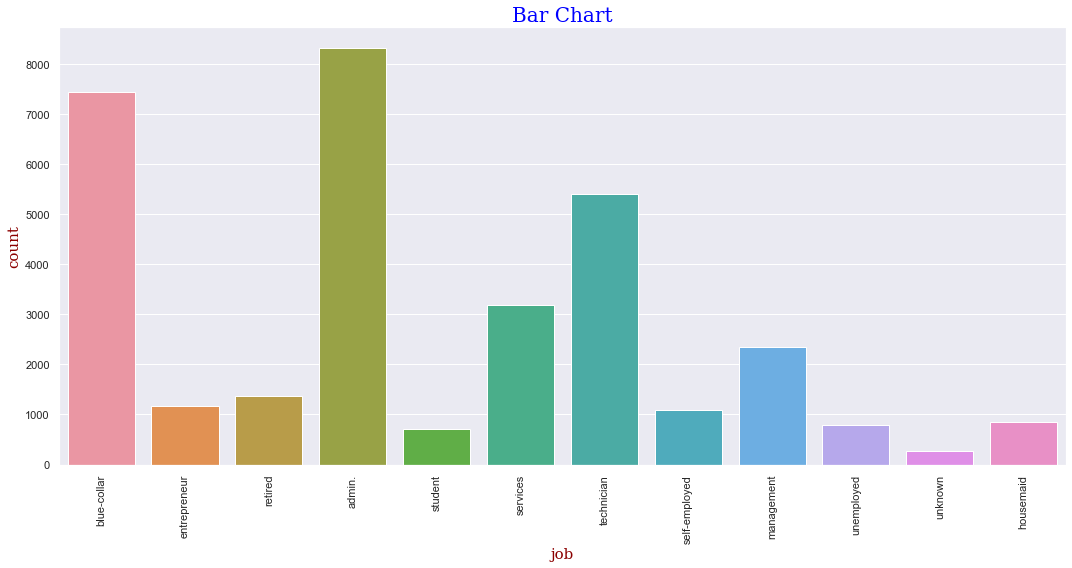

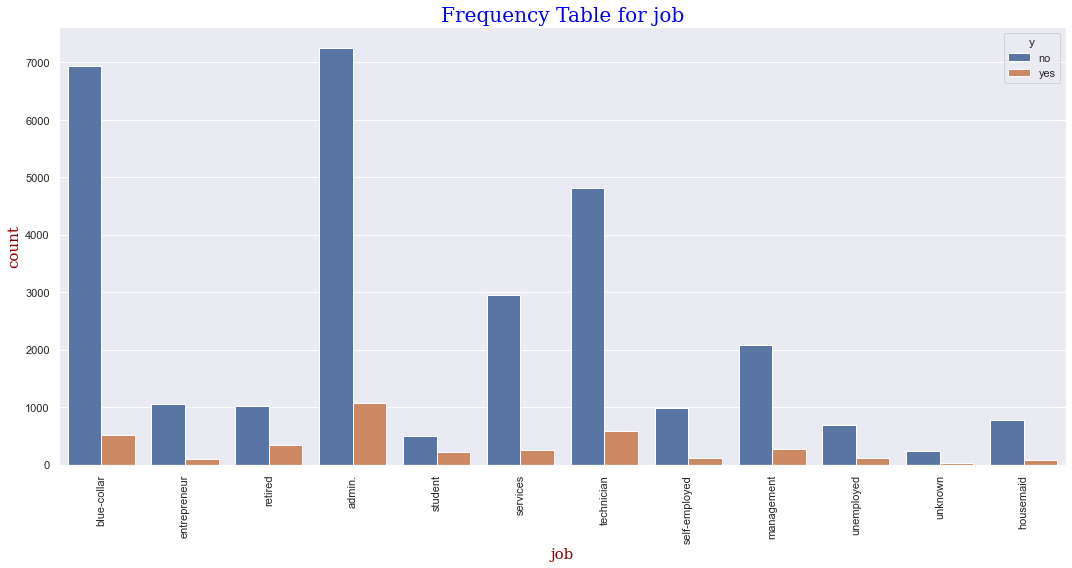

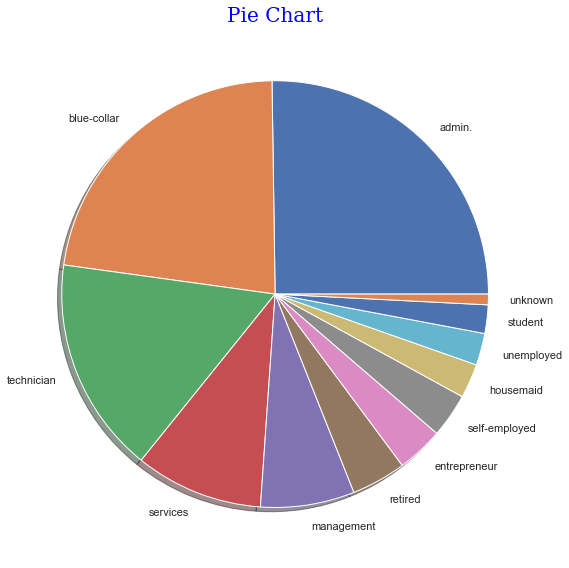

marital
Count Distribution
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

 Count% Distribution
married     0.605554
single      0.280941
divorced    0.111533
unknown     0.001973
Name: marital, dtype: float64


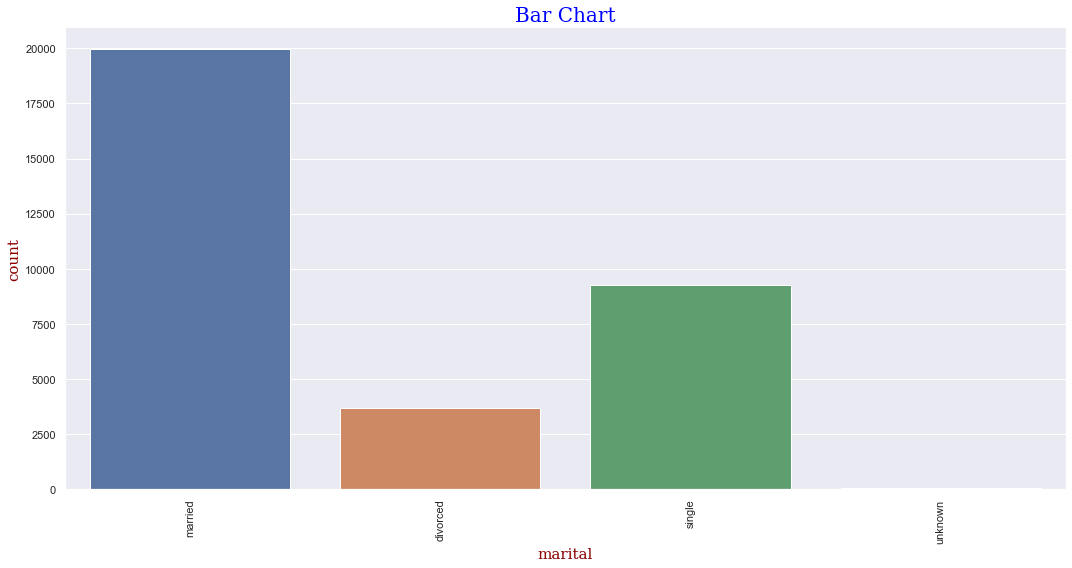

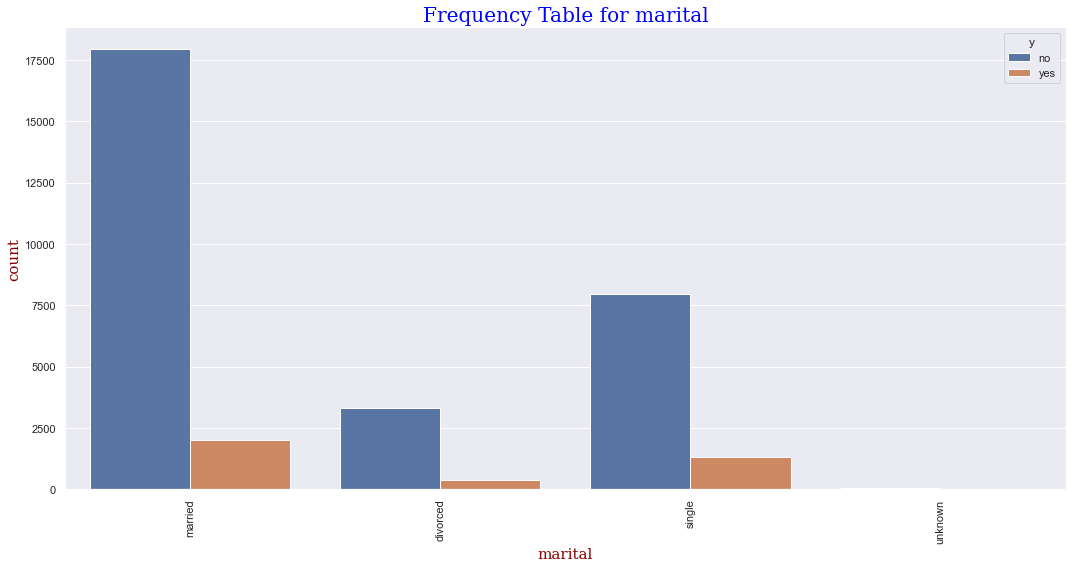

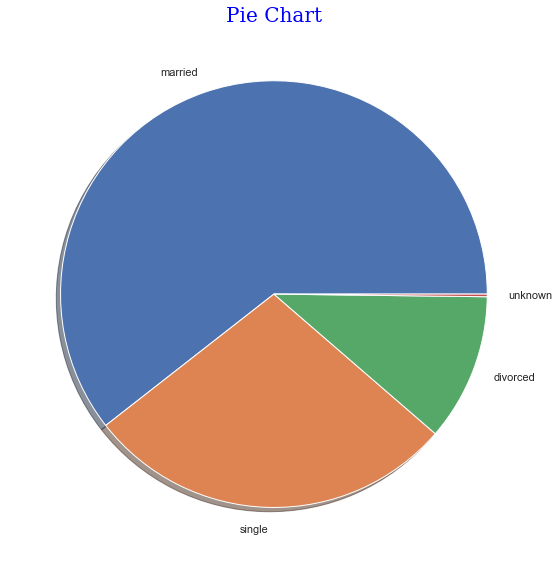

education
Count Distribution
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

 Count% Distribution
university.degree      0.295478
high.school            0.230531
basic.9y               0.146464
professional.course    0.127223
basic.4y               0.100819
basic.6y               0.056601
unknown                0.042398
illiterate             0.000486
Name: education, dtype: float64


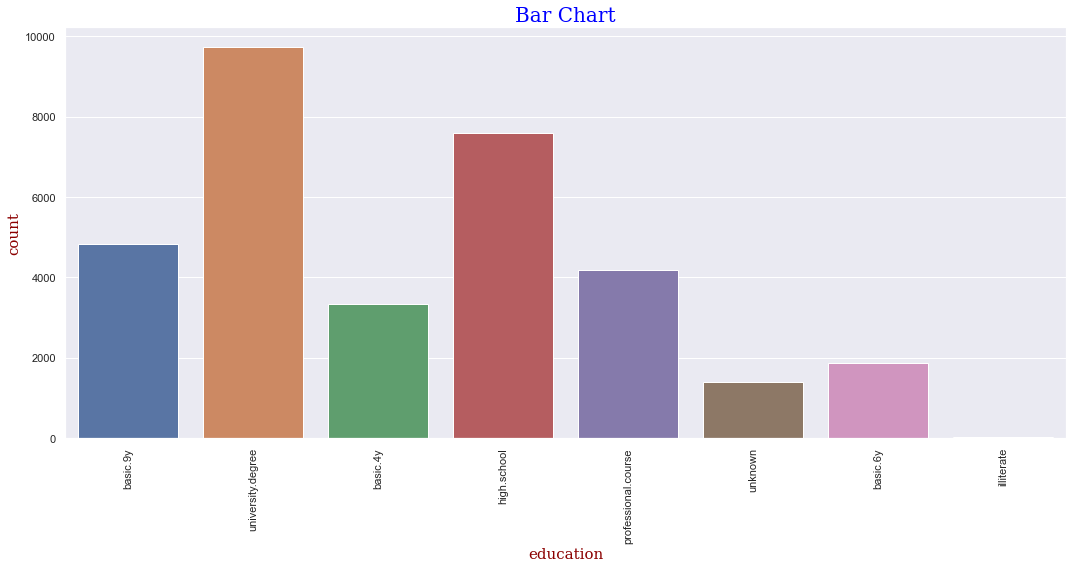

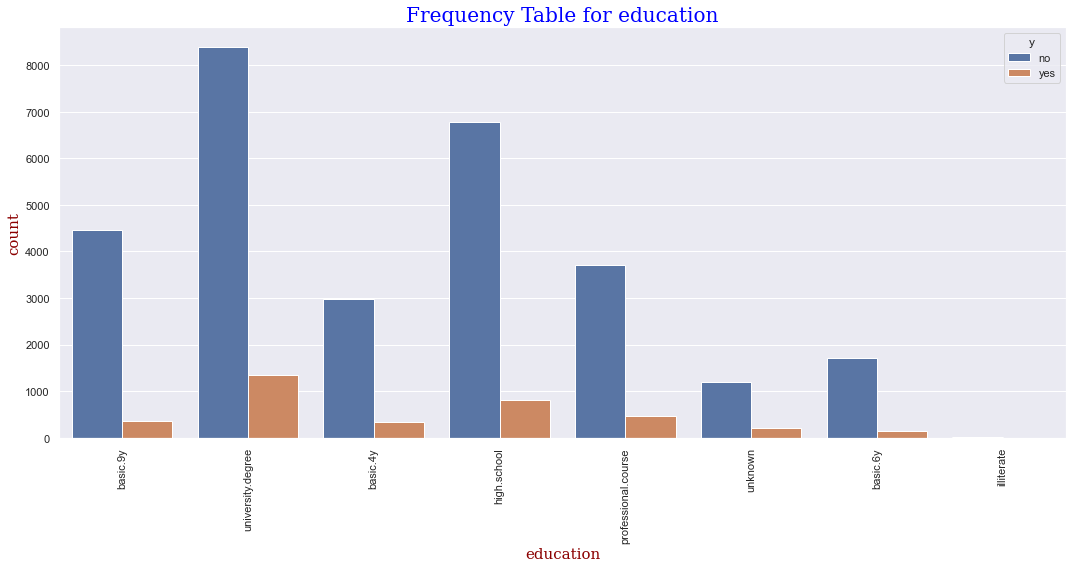

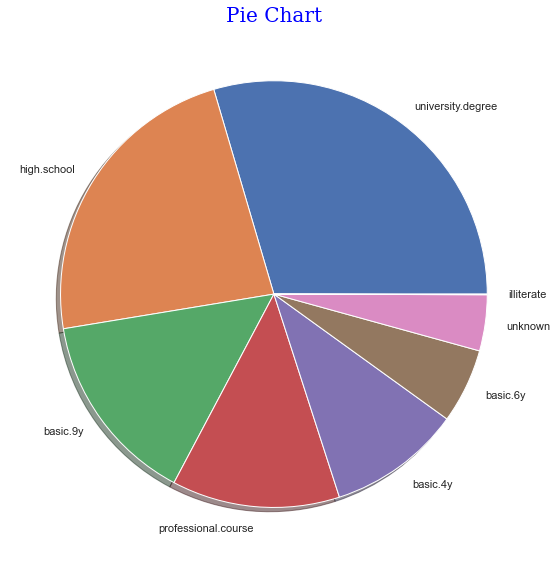

default
Count Distribution
no         26007
unknown     6940
yes            3
Name: default, dtype: int64

 Count% Distribution
no         0.789287
unknown    0.210622
yes        0.000091
Name: default, dtype: float64


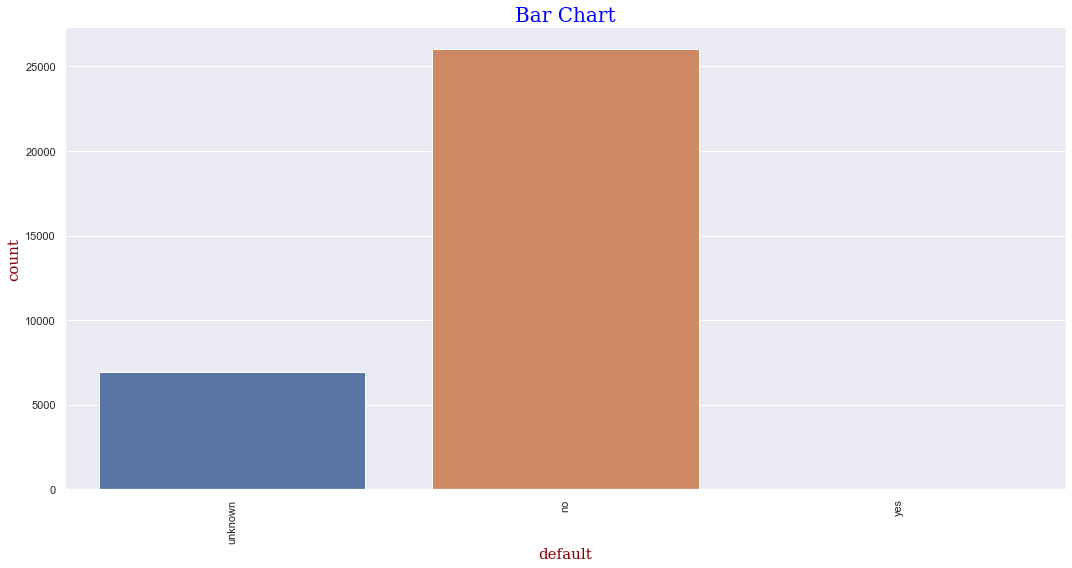

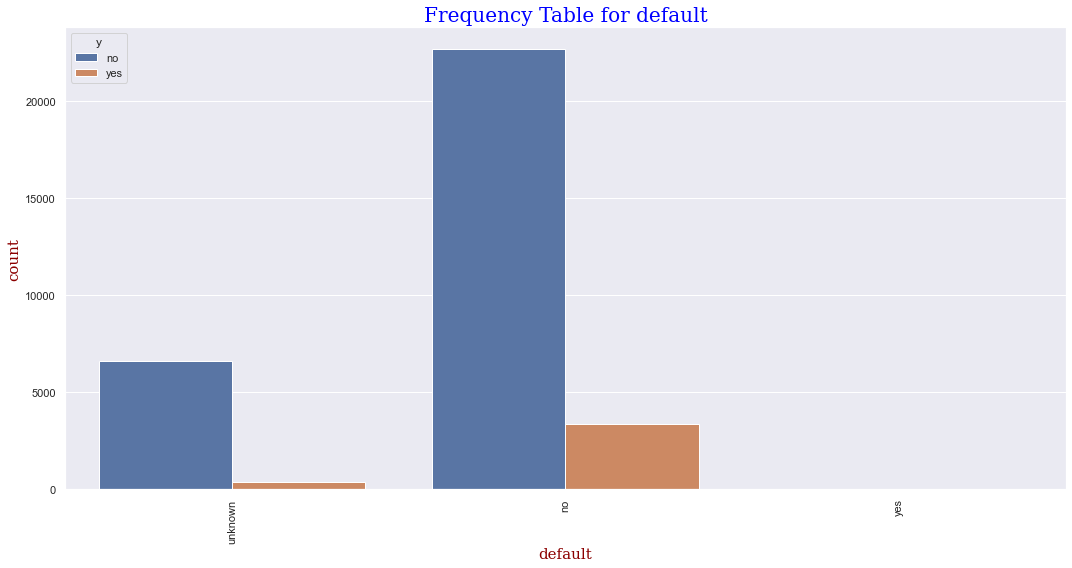

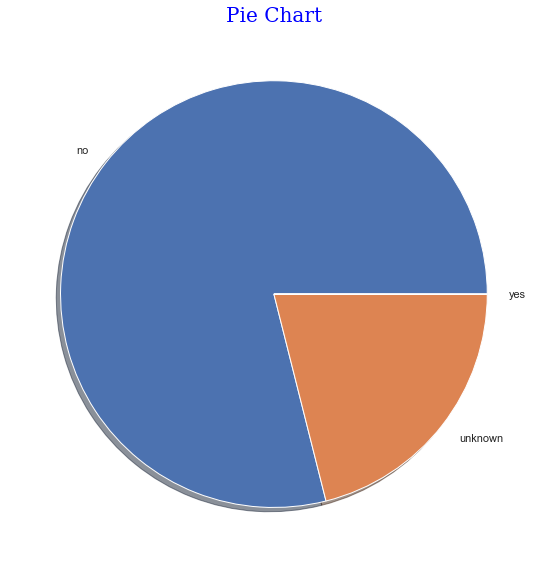

housing
Count Distribution
yes        17254
no         14900
unknown      796
Name: housing, dtype: int64

 Count% Distribution
yes        0.523642
no         0.452200
unknown    0.024158
Name: housing, dtype: float64


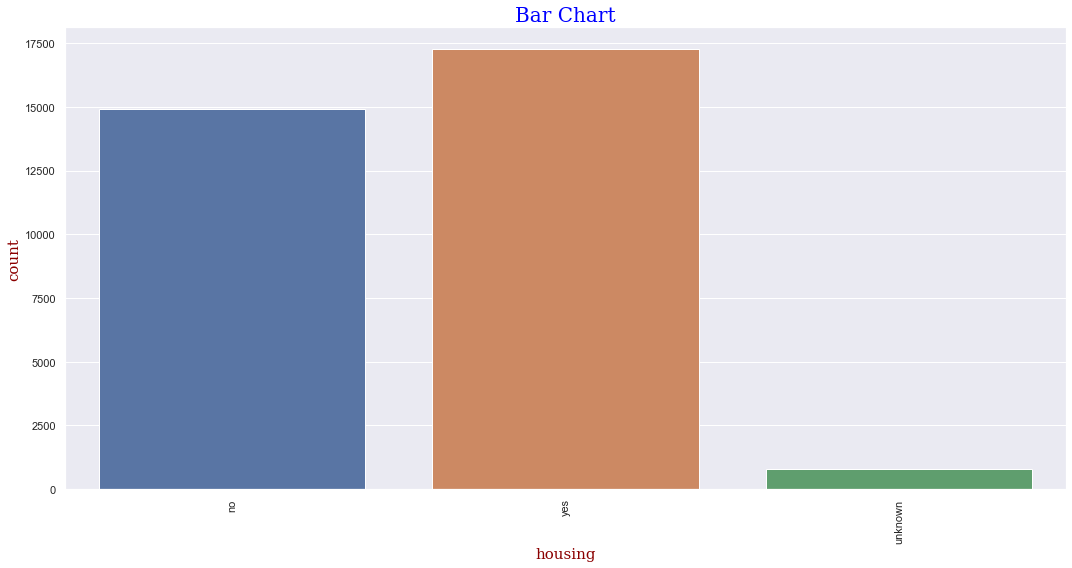

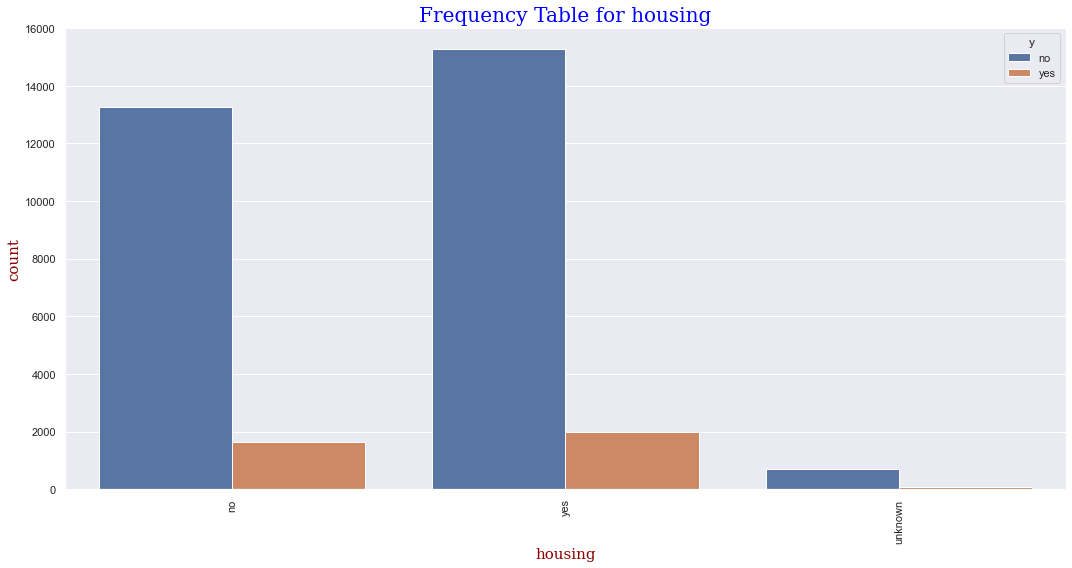

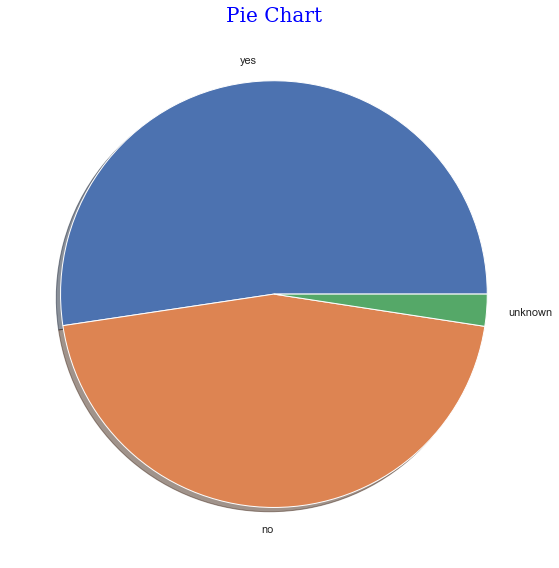

loan
Count Distribution
no         27131
yes         5023
unknown      796
Name: loan, dtype: int64

 Count% Distribution
no         0.823399
yes        0.152443
unknown    0.024158
Name: loan, dtype: float64


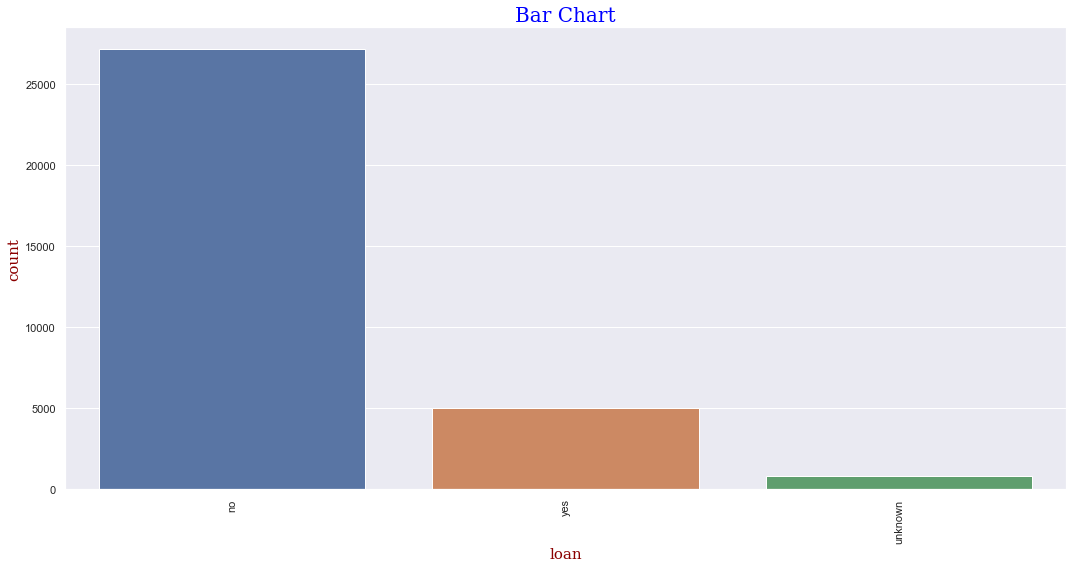

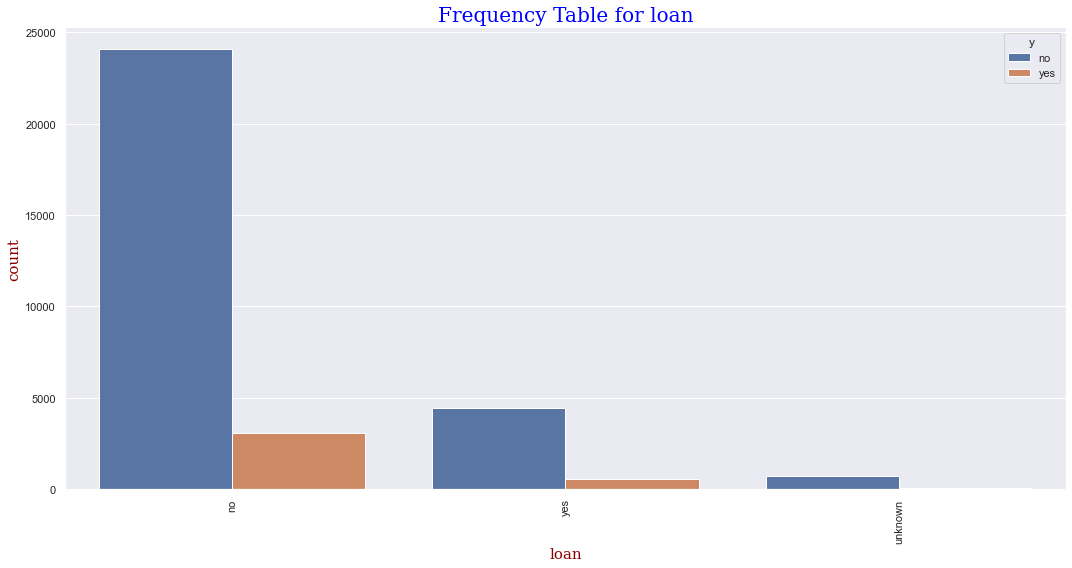

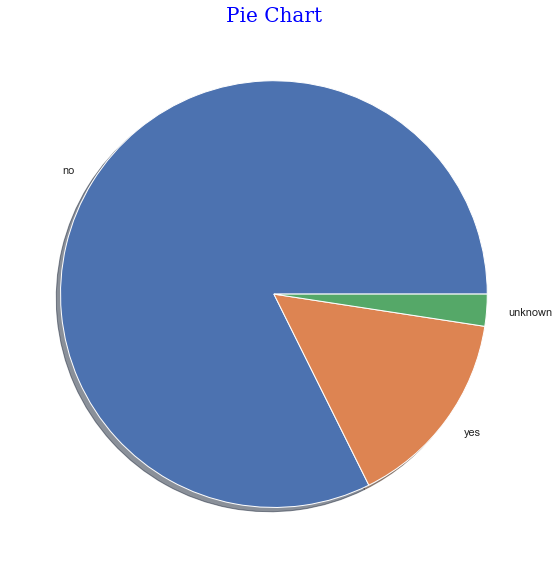

contact
Count Distribution
cellular     20908
telephone    12042
Name: contact, dtype: int64

 Count% Distribution
cellular     0.634537
telephone    0.365463
Name: contact, dtype: float64


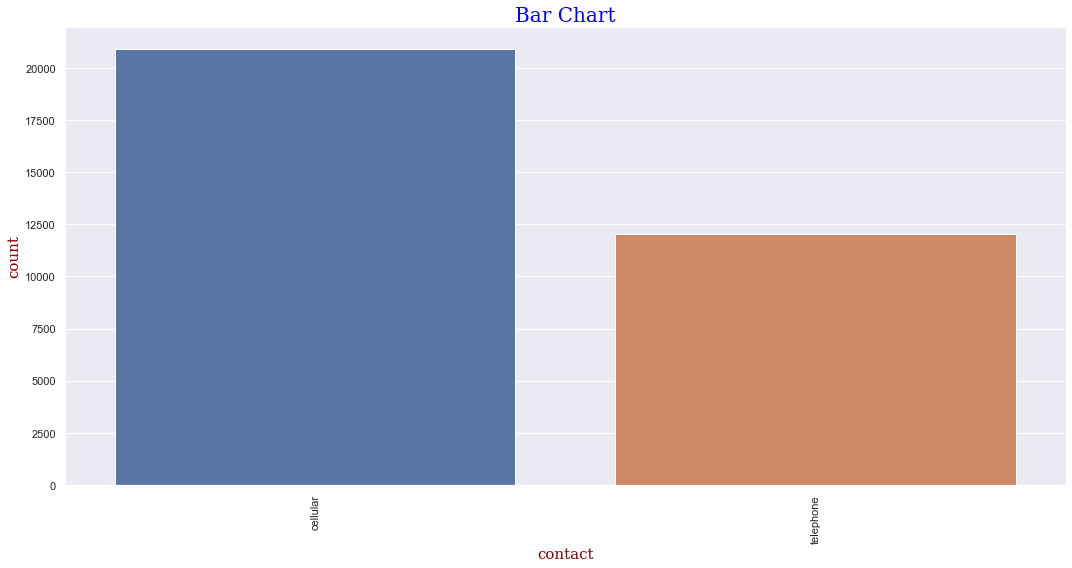

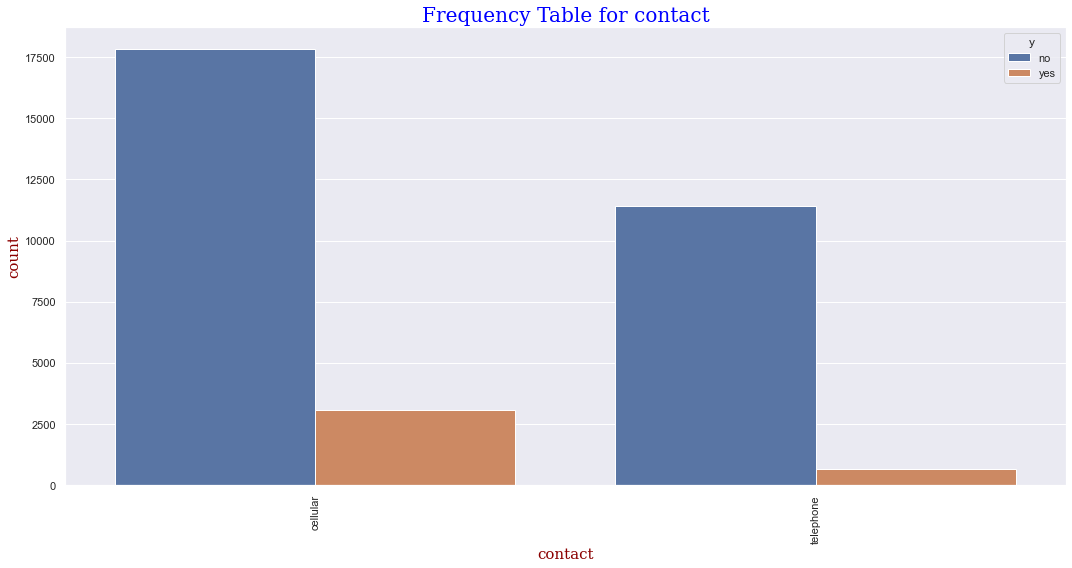

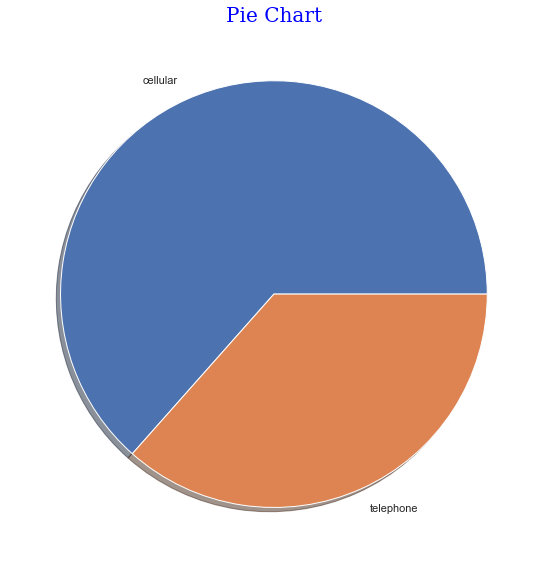

month
Count Distribution
may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

 Count% Distribution
may    0.334173
jul    0.174901
aug    0.150167
jun    0.128892
nov    0.099120
apr    0.063278
oct    0.017815
sep    0.014082
mar    0.013232
dec    0.004340
Name: month, dtype: float64


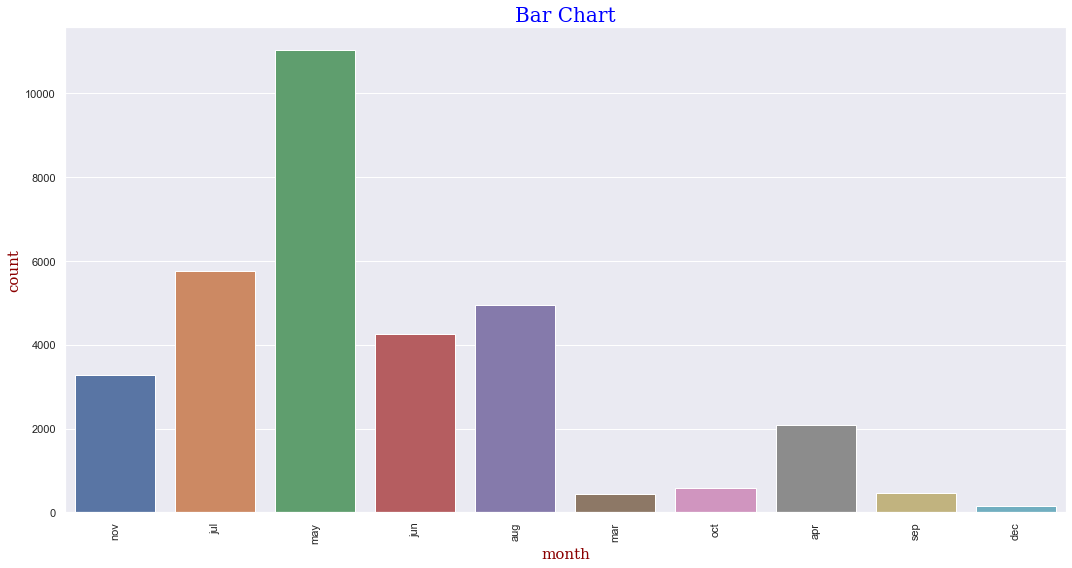

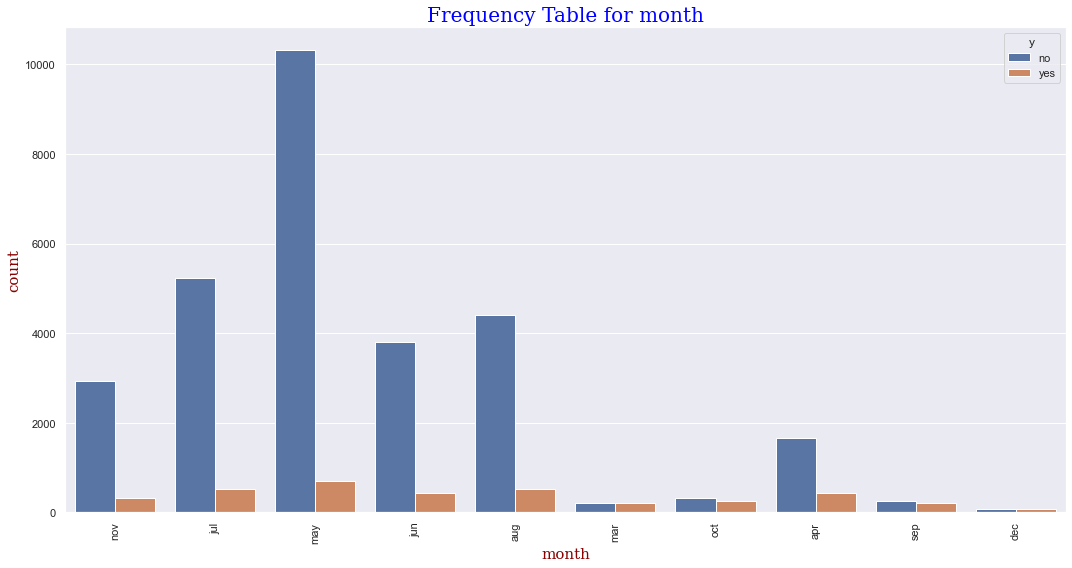

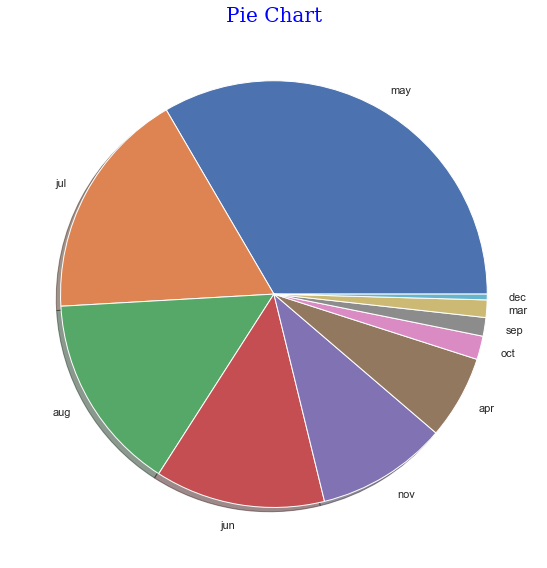

day_of_week
Count Distribution
thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

 Count% Distribution
thu    0.208103
mon    0.206737
wed    0.197724
tue    0.195569
fri    0.191866
Name: day_of_week, dtype: float64


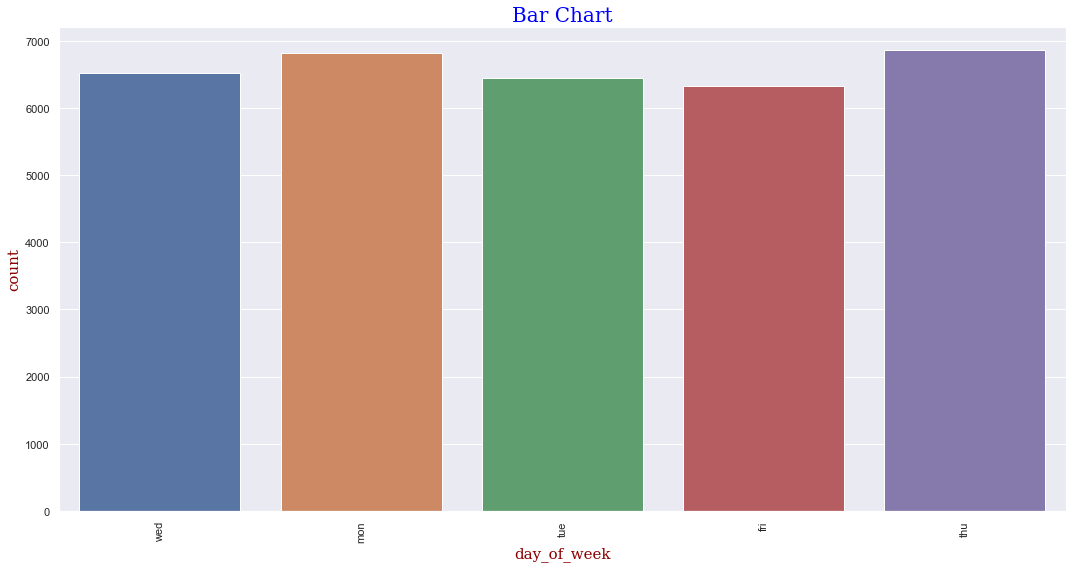

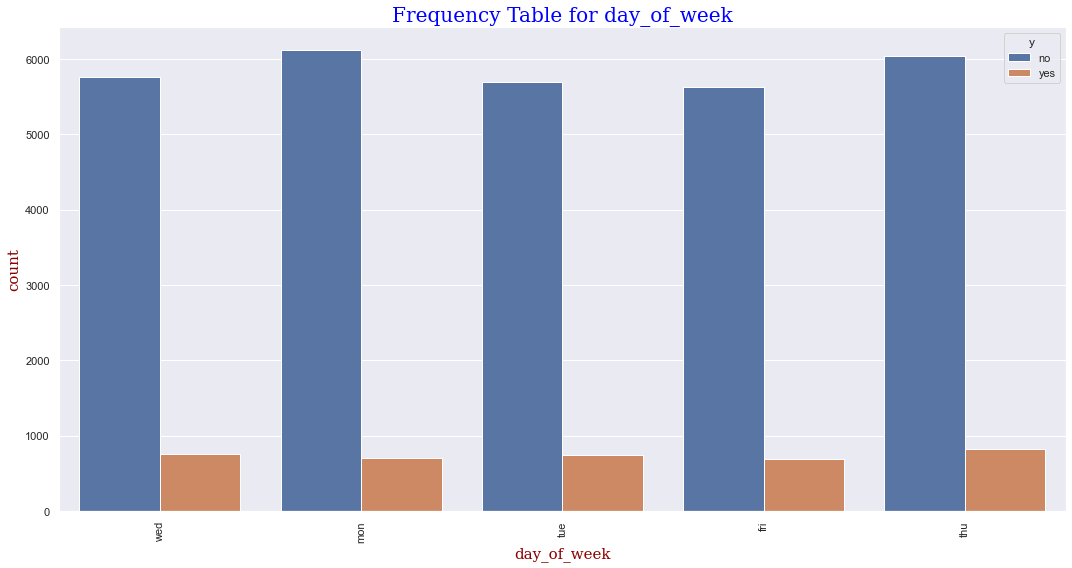

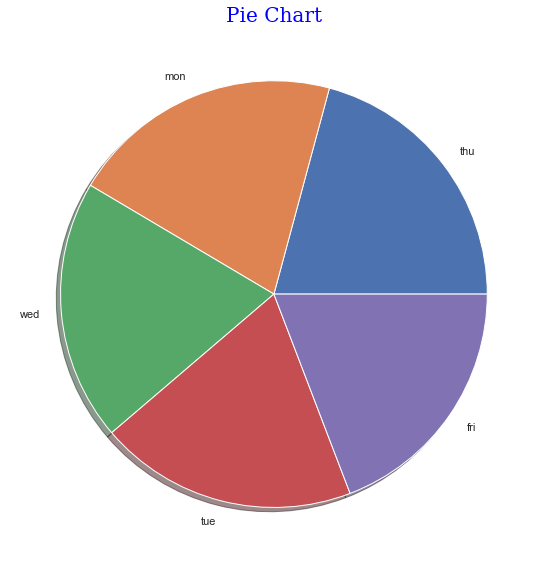

poutcome
Count Distribution
nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

 Count% Distribution
nonexistent    0.862398
failure        0.104067
success        0.033536
Name: poutcome, dtype: float64


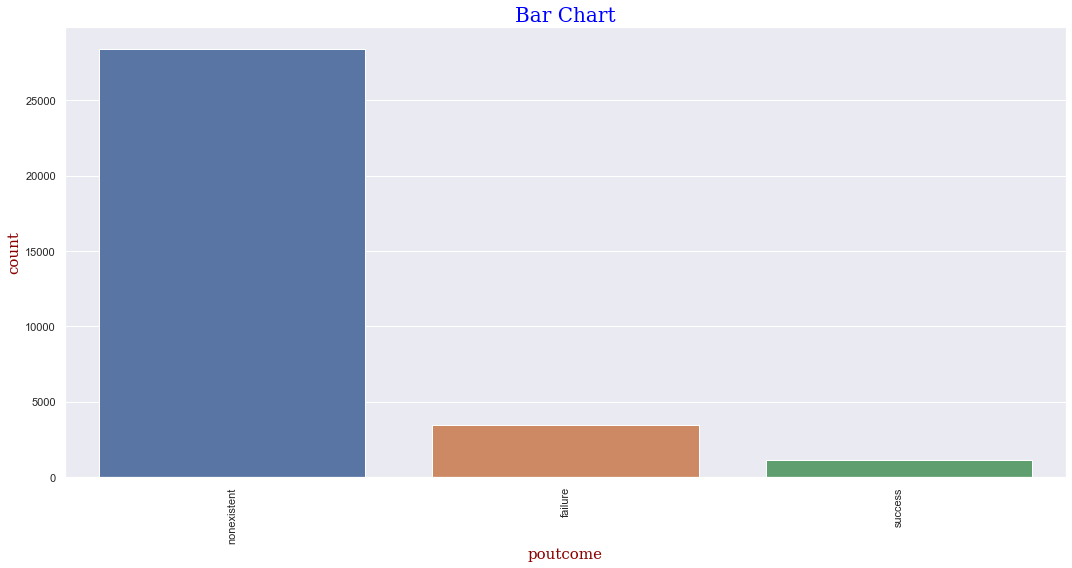

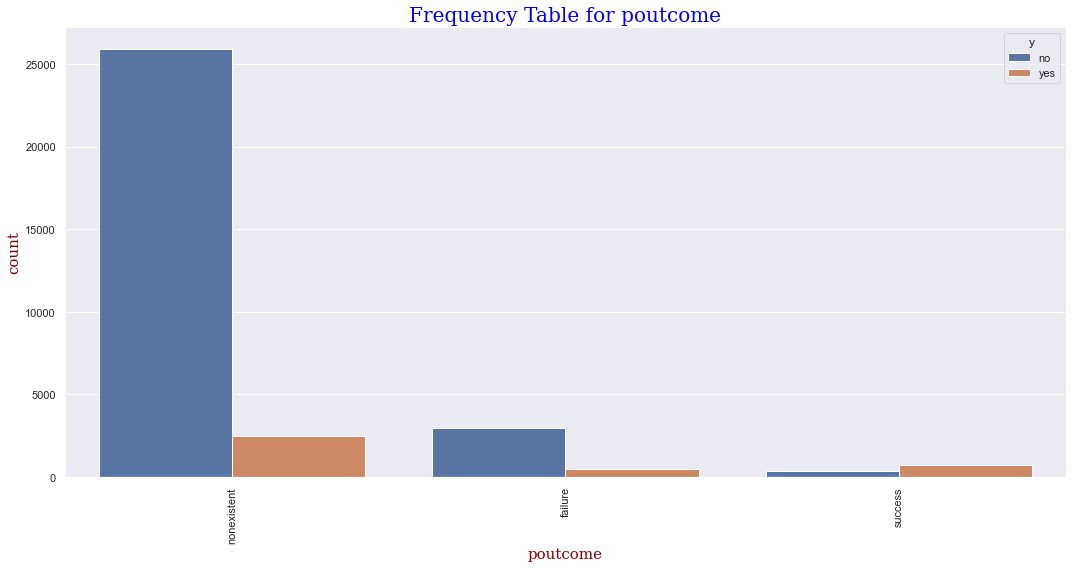

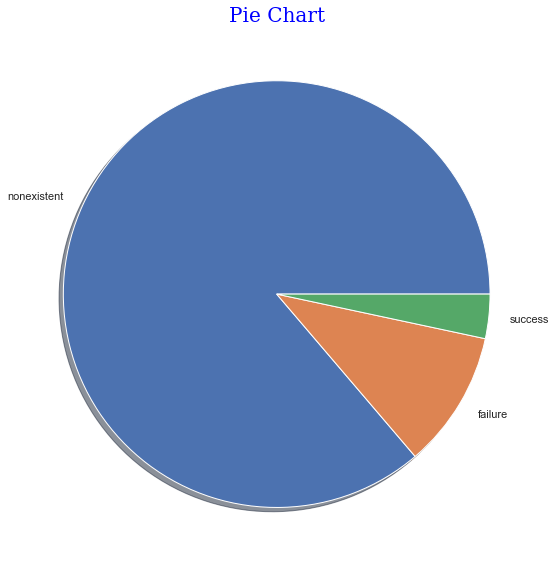

In [10]:
target = 'y'
for col in cat_variables:
    if col != target:
        print(col)
        categorical_explore(df,col,target,hue=True,bar=True,pie=True)

## Bivariate Analysis

### Continuous & Continuous

#### Scatter Plot

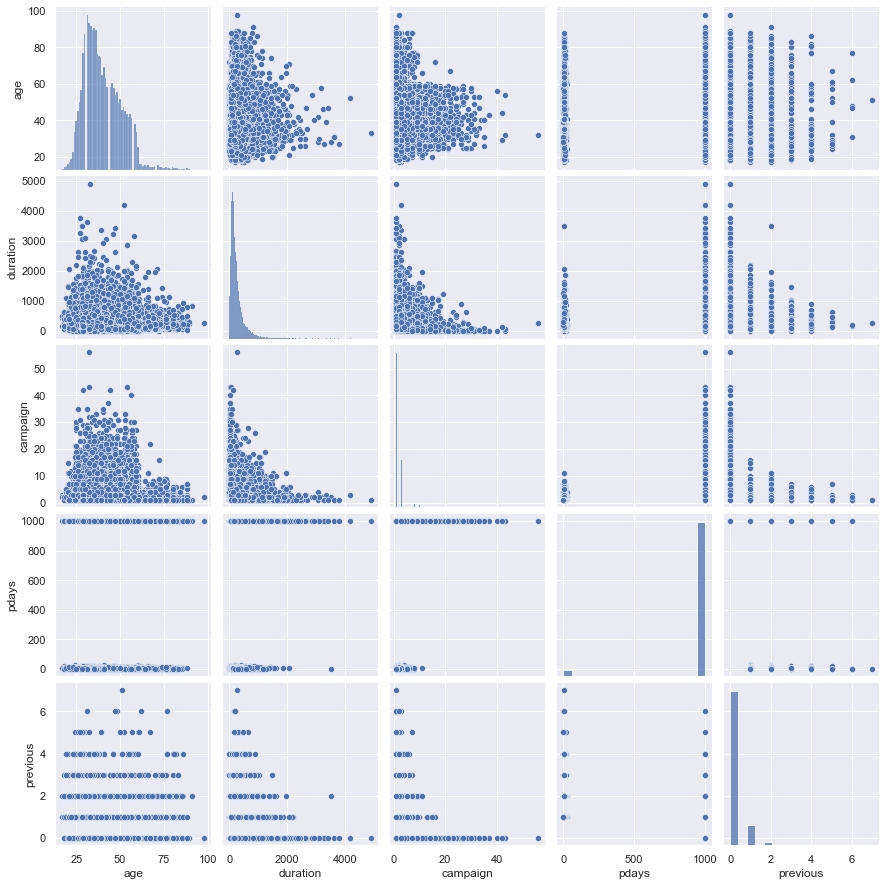

In [11]:
sns.pairplot(df[num_variables])

#### Heatmap

<AxesSubplot:>

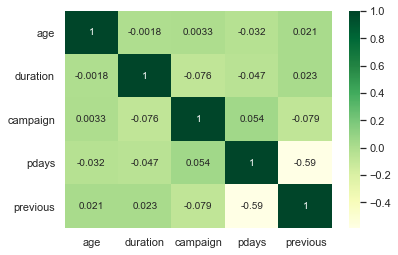

In [12]:
sns.heatmap(df[num_variables].corr(),annot=True,cmap="YlGn")

### Categorical & Categorical

In [13]:
def categorical_categorical(df,col,target):
            print(pd.crosstab(df[col],df[target]))
            print('\n')
            print(pd.crosstab(df[col],df[target],normalize='index'))
            print('\n')
            pd.crosstab(df[col],df[target]).plot(kind='bar', stacked=True,
                            figsize=(15,8),title='Stacked Column Chart')
            plt.show()
            pd.crosstab(df[col],df[target],normalize='index').plot(kind='bar', 
                        stacked=True, figsize=(15,8),title='Stacked% Column Chart')
            plt.show()

job
y                no   yes
job                      
admin.         7244  1070
blue-collar    6926   515
entrepreneur   1060   100
housemaid       769    86
management     2076   269
retired        1018   348
self-employed   980   119
services       2942   254
student         494   217
technician     4815   585
unemployed      682   116
unknown         232    33


y                    no       yes
job                              
admin.         0.871301  0.128699
blue-collar    0.930789  0.069211
entrepreneur   0.913793  0.086207
housemaid      0.899415  0.100585
management     0.885288  0.114712
retired        0.745242  0.254758
self-employed  0.891720  0.108280
services       0.920526  0.079474
student        0.694796  0.305204
technician     0.891667  0.108333
unemployed     0.854637  0.145363
unknown        0.875472  0.124528




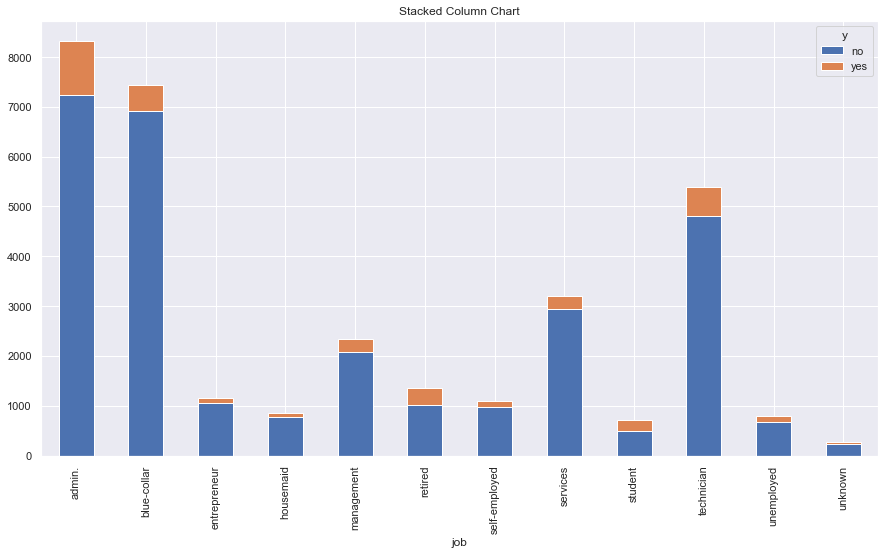

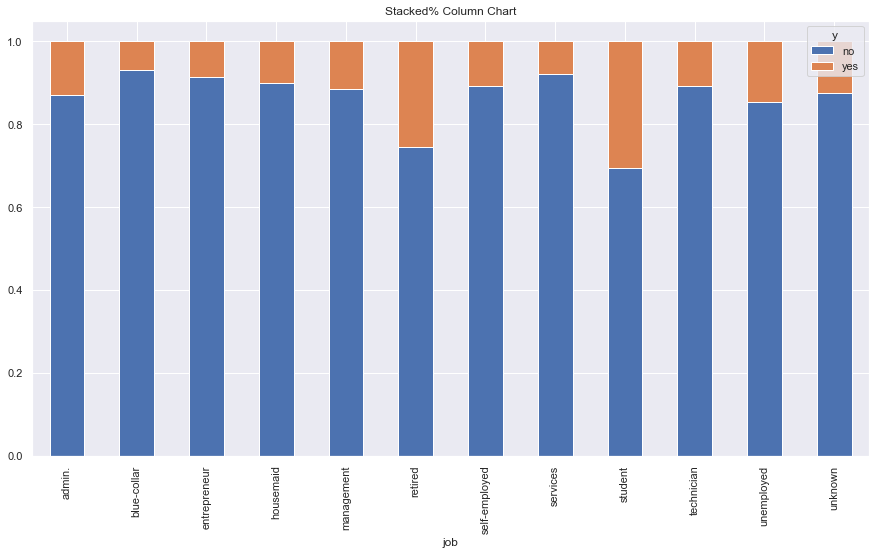

marital
y            no   yes
marital              
divorced   3304   371
married   17933  2020
single     7947  1310
unknown      54    11


y               no       yes
marital                     
divorced  0.899048  0.100952
married   0.898762  0.101238
single    0.858485  0.141515
unknown   0.830769  0.169231




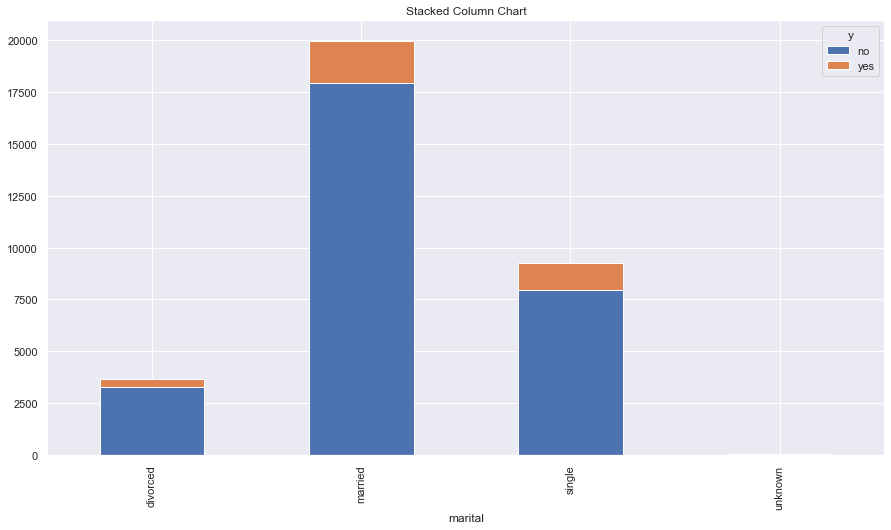

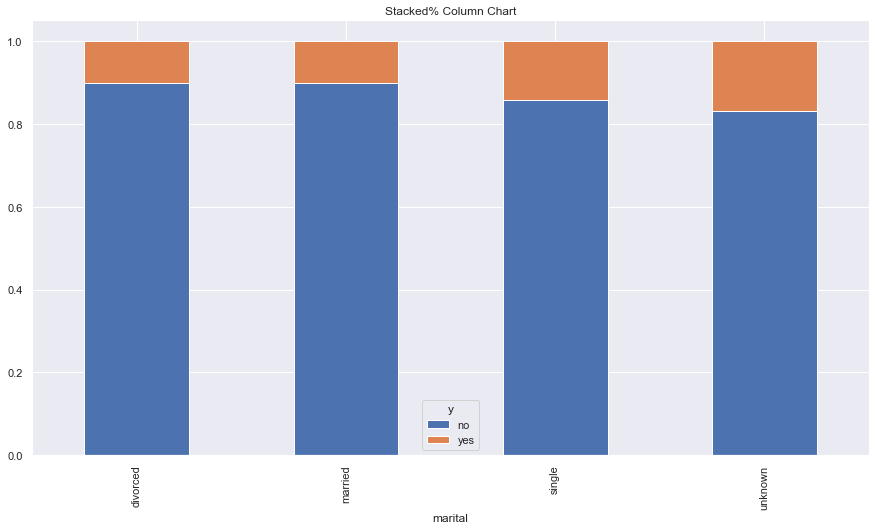

education
y                      no   yes
education                      
basic.4y             2978   344
basic.6y             1709   156
basic.9y             4457   369
high.school          6781   815
illiterate             13     3
professional.course  3719   473
university.degree    8391  1345
unknown              1190   207


y                          no       yes
education                              
basic.4y             0.896448  0.103552
basic.6y             0.916354  0.083646
basic.9y             0.923539  0.076461
high.school          0.892707  0.107293
illiterate           0.812500  0.187500
professional.course  0.887166  0.112834
university.degree    0.861853  0.138147
unknown              0.851825  0.148175




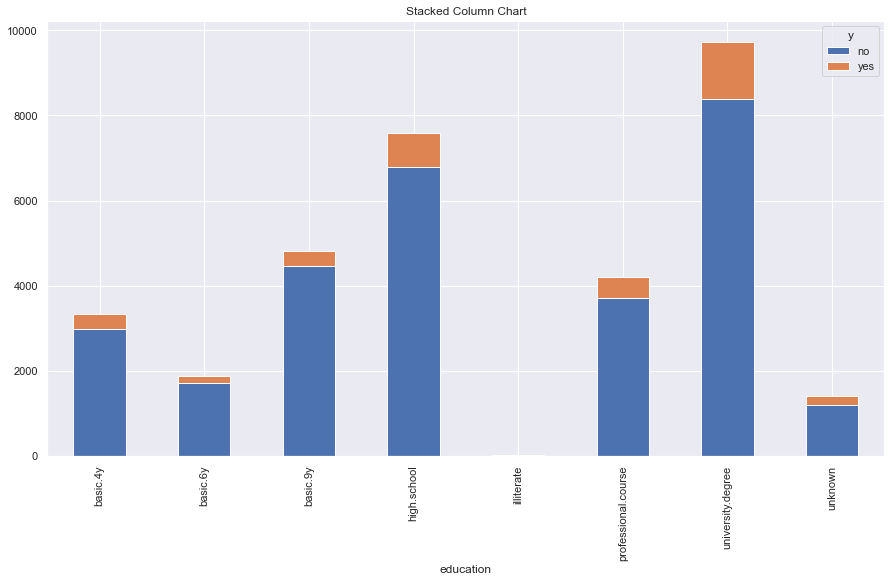

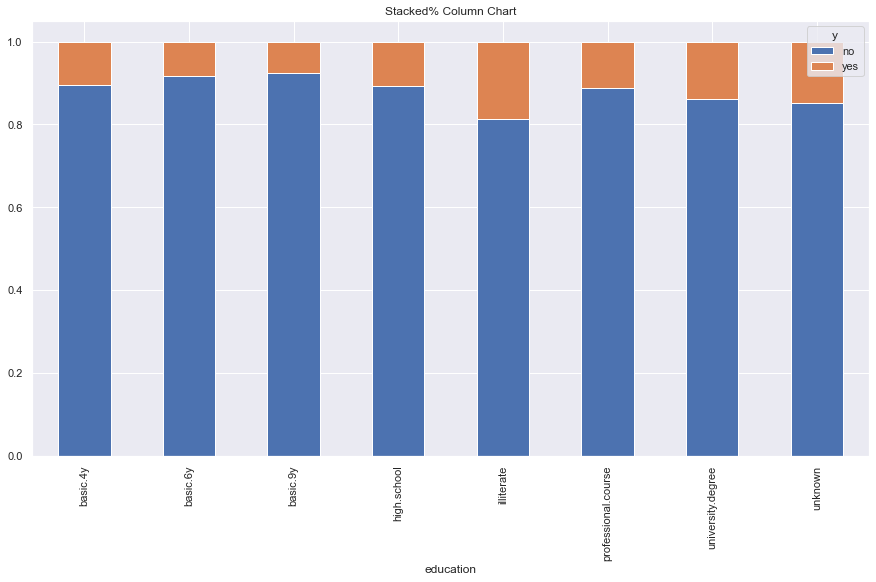

default
y           no   yes
default             
no       22656  3351
unknown   6579   361
yes          3     0


y              no       yes
default                    
no       0.871150  0.128850
unknown  0.947983  0.052017
yes      1.000000  0.000000




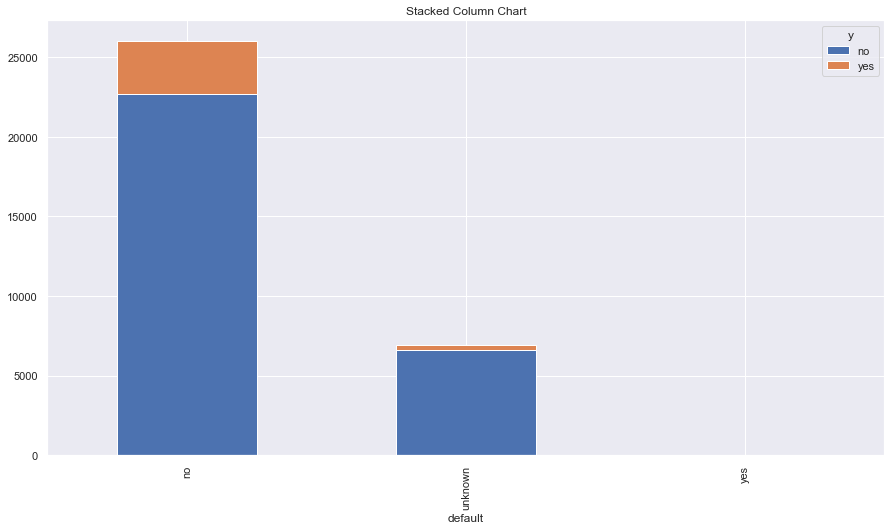

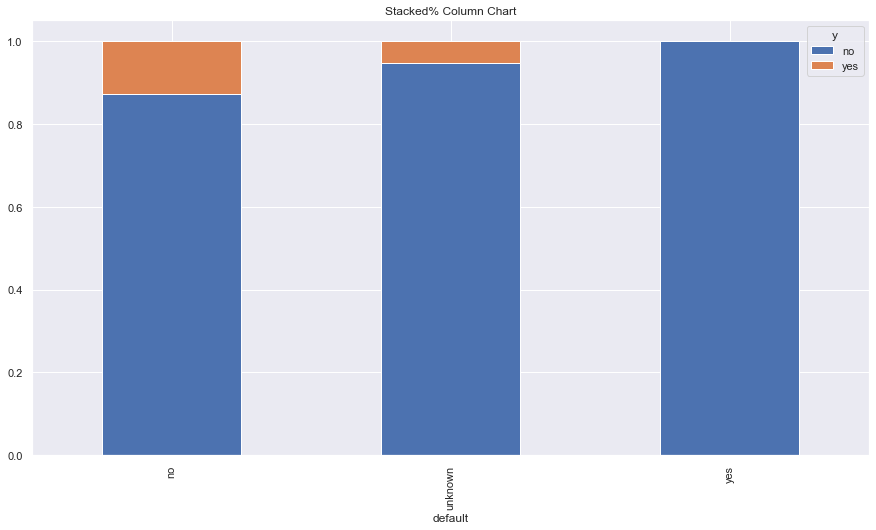

housing
y           no   yes
housing             
no       13272  1628
unknown    706    90
yes      15260  1994


y              no       yes
housing                    
no       0.890738  0.109262
unknown  0.886935  0.113065
yes      0.884433  0.115567




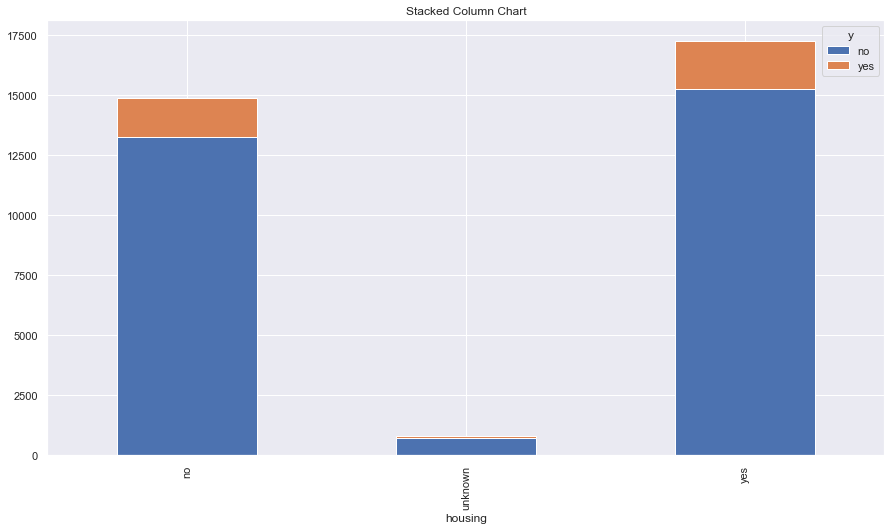

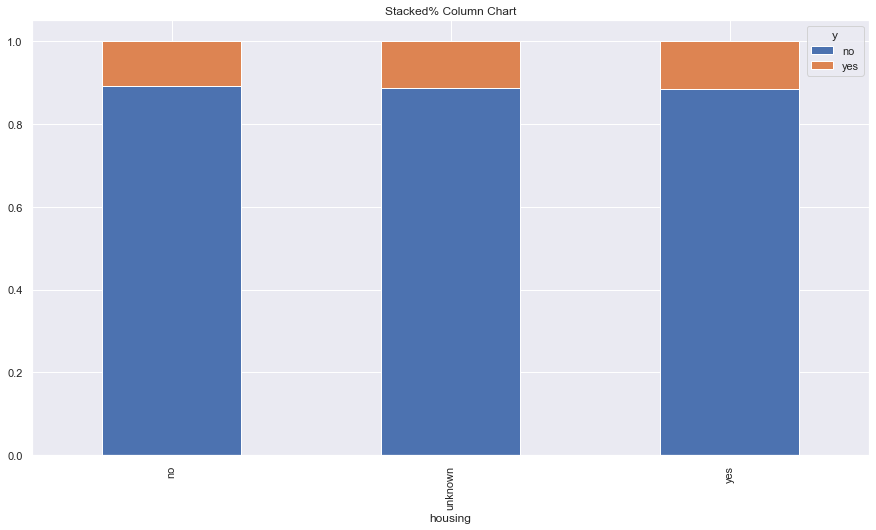

loan
y           no   yes
loan                
no       24073  3058
unknown    706    90
yes       4459   564


y              no       yes
loan                       
no       0.887288  0.112712
unknown  0.886935  0.113065
yes      0.887717  0.112283




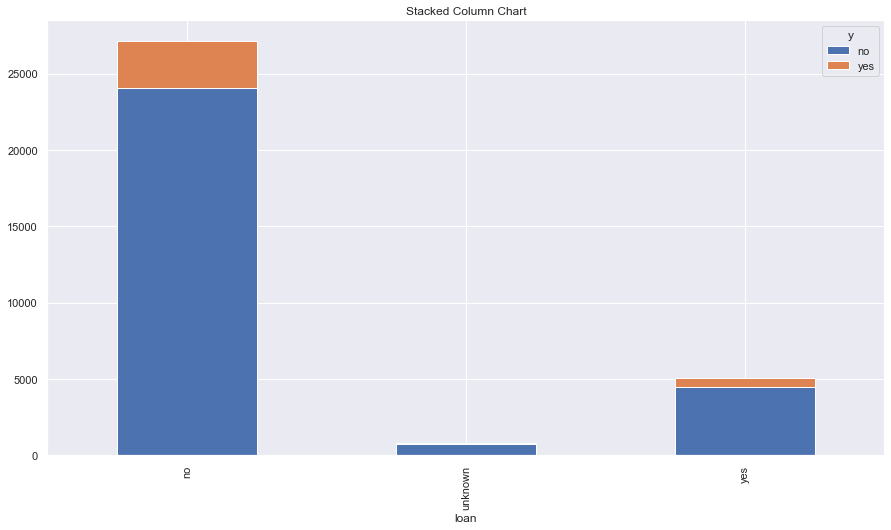

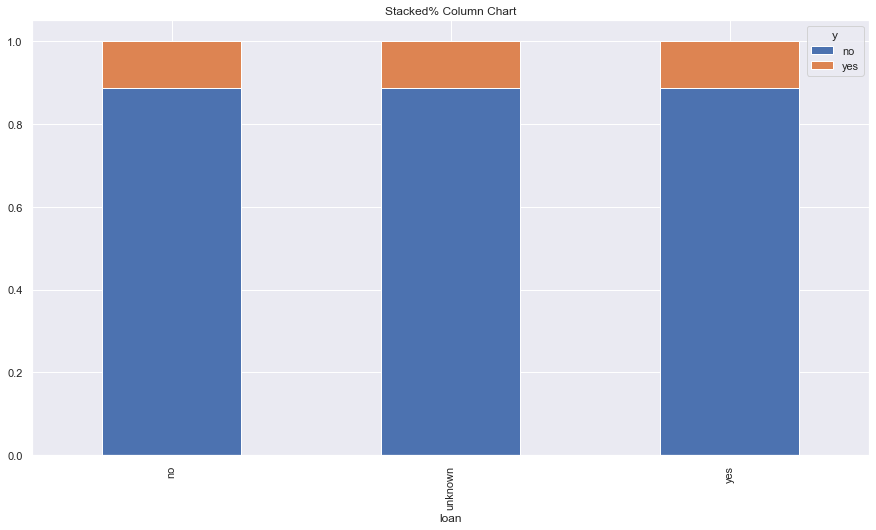

contact
y             no   yes
contact               
cellular   17834  3074
telephone  11404   638


y                no       yes
contact                      
cellular   0.852975  0.147025
telephone  0.947019  0.052981




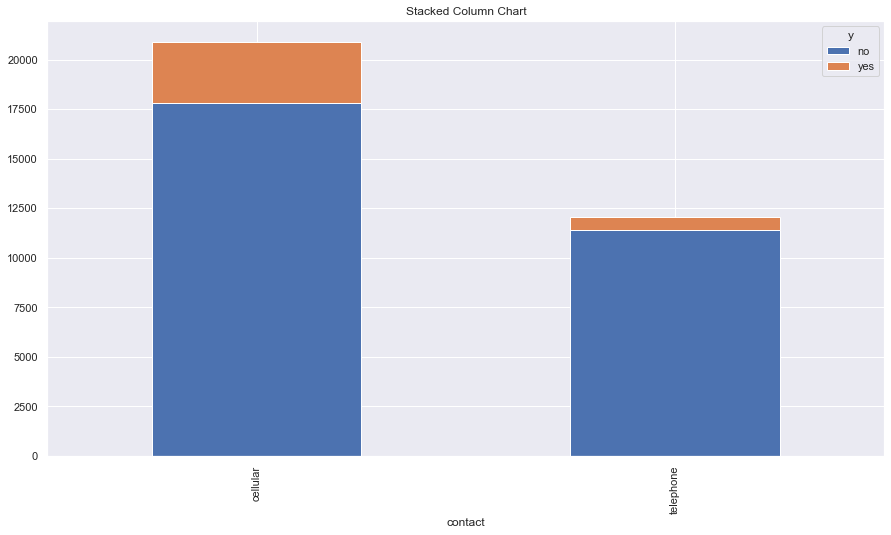

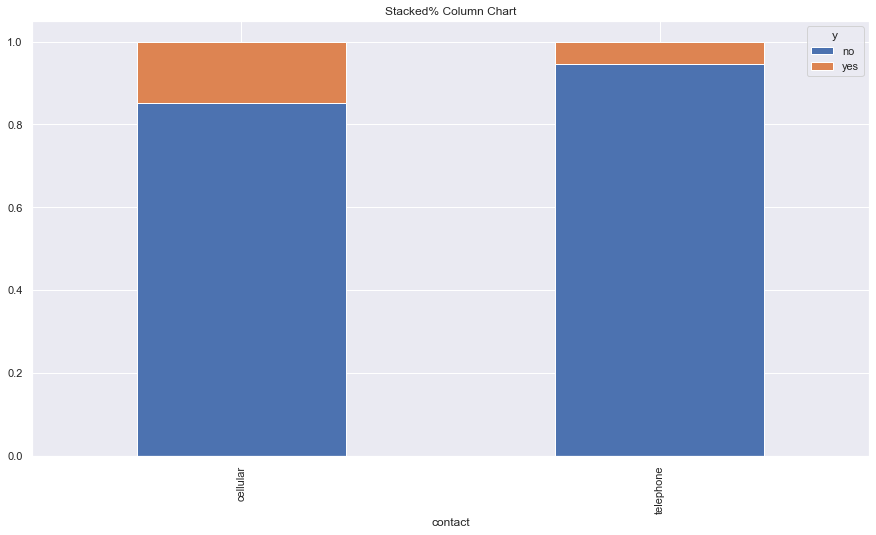

month
y         no  yes
month            
apr     1658  427
aug     4417  531
dec       71   72
jul     5231  532
jun     3806  441
mar      219  217
may    10312  699
nov     2934  332
oct      333  254
sep      257  207


y            no       yes
month                    
apr    0.795204  0.204796
aug    0.892684  0.107316
dec    0.496503  0.503497
jul    0.907687  0.092313
jun    0.896162  0.103838
mar    0.502294  0.497706
may    0.936518  0.063482
nov    0.898347  0.101653
oct    0.567291  0.432709
sep    0.553879  0.446121




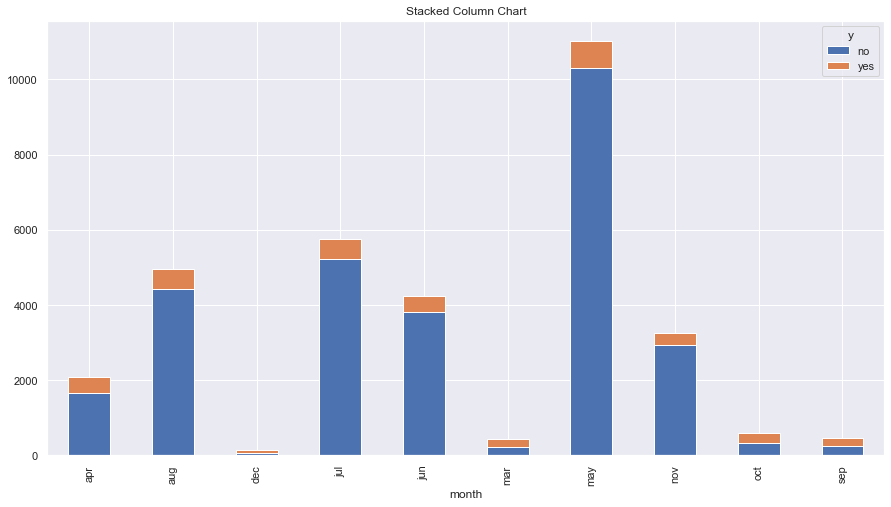

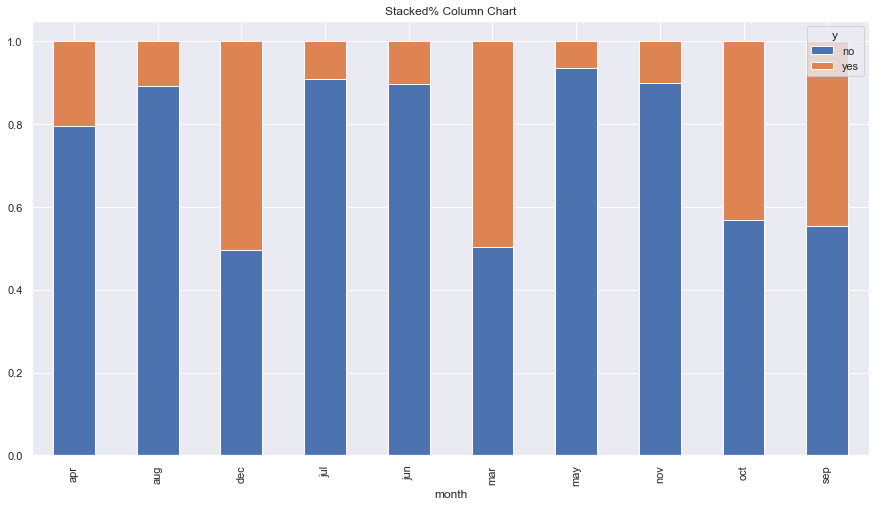

day_of_week
y              no  yes
day_of_week           
fri          5632  690
mon          6114  698
thu          6034  823
tue          5696  748
wed          5762  753


y                  no       yes
day_of_week                    
fri          0.890857  0.109143
mon          0.897534  0.102466
thu          0.879977  0.120023
tue          0.883923  0.116077
wed          0.884421  0.115579




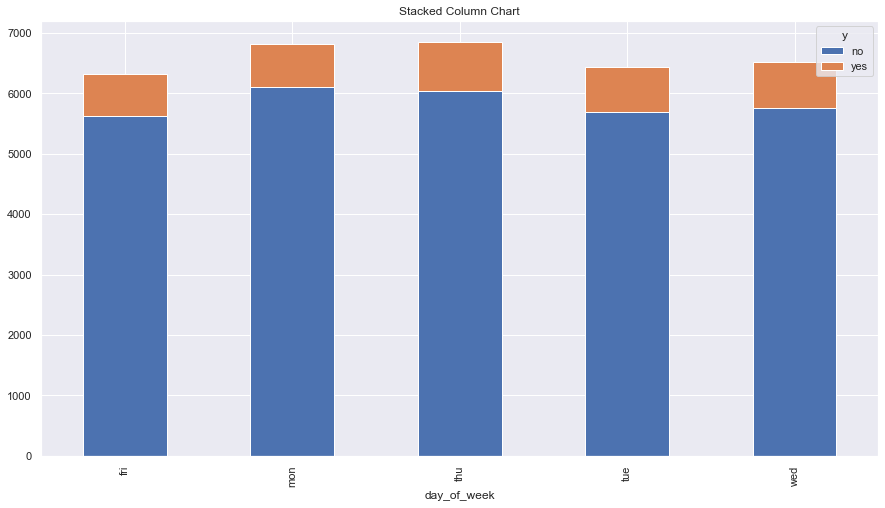

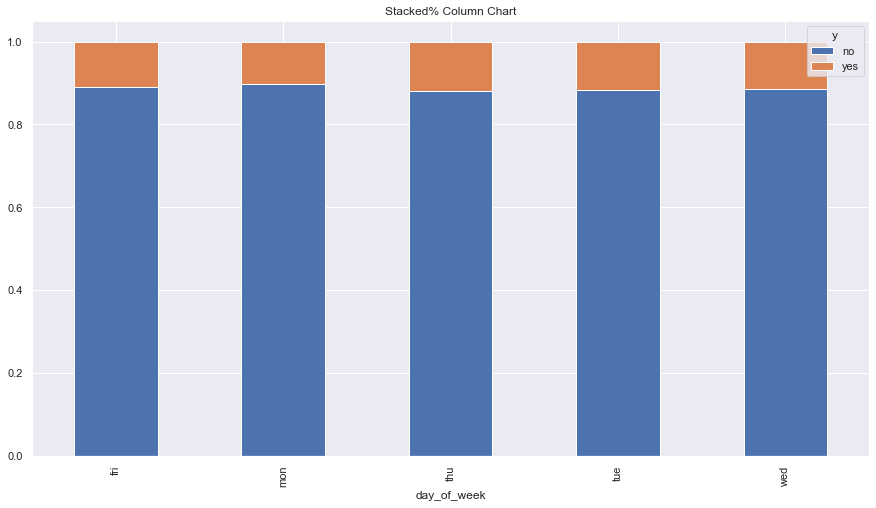

poutcome
y               no   yes
poutcome                
failure       2935   494
nonexistent  25915  2501
success        388   717


y                  no       yes
poutcome                       
failure      0.855935  0.144065
nonexistent  0.911986  0.088014
success      0.351131  0.648869




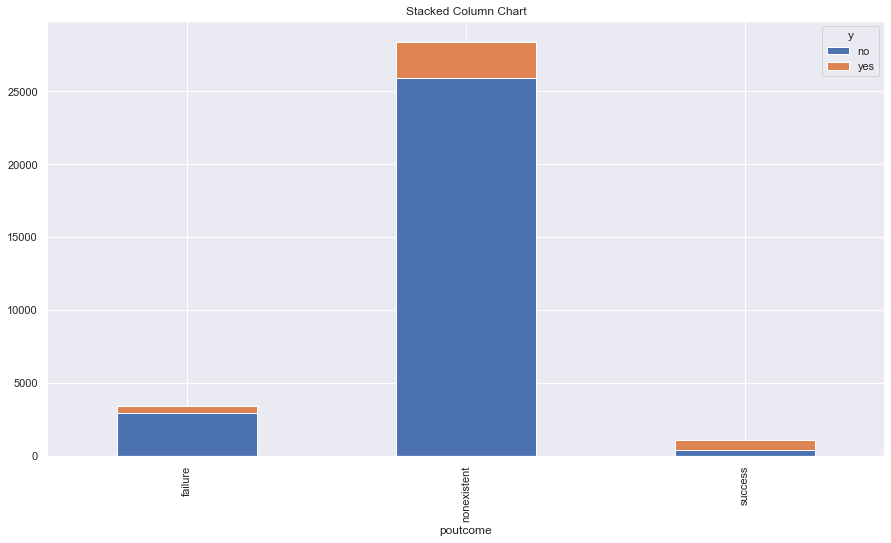

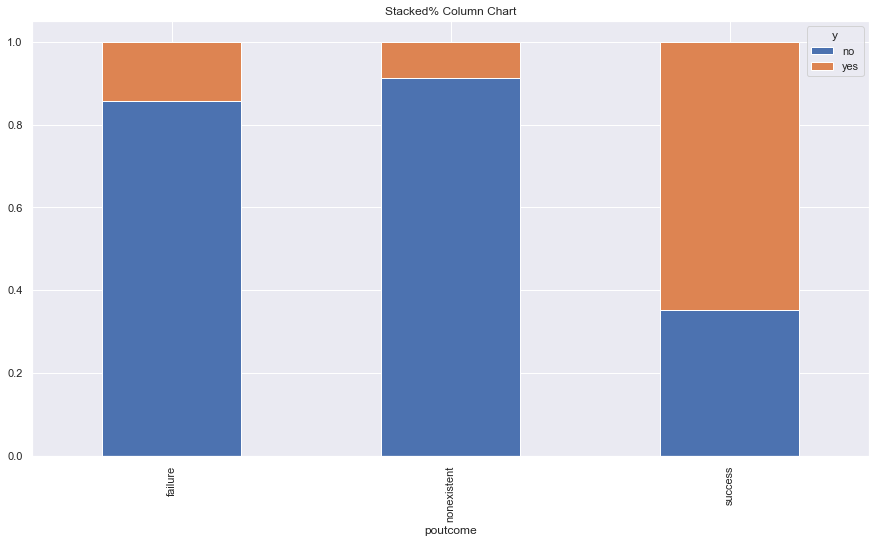

In [14]:
target = 'y'
for col in cat_variables:
    if col != target:
        print(col)
        categorical_categorical(df,col,target)

In [15]:
df_original = df.copy()

In [16]:
df.drop(['pdays','previous'],1,inplace=True)
num_variables.remove('pdays')
num_variables.remove('previous')
num_variables

['age', 'duration', 'campaign']

# Outlier Detection Techniques

## Case One - No Outlier Detection

### Missing Value Handling

In [17]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64

In [18]:
for col in cat_variables:
    m = df[col].mode()[0]
    df[col] = df[col].replace('unknown',m)

In [19]:
df.job.value_counts()

admin.           8579
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
Name: job, dtype: int64

### Event Rate

In [20]:
df.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [21]:
df.y.value_counts(True)

no     0.887344
yes    0.112656
Name: y, dtype: float64

In [22]:
df_original_before_od = df.copy()

### Splitting Data

In [23]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

### Handling Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

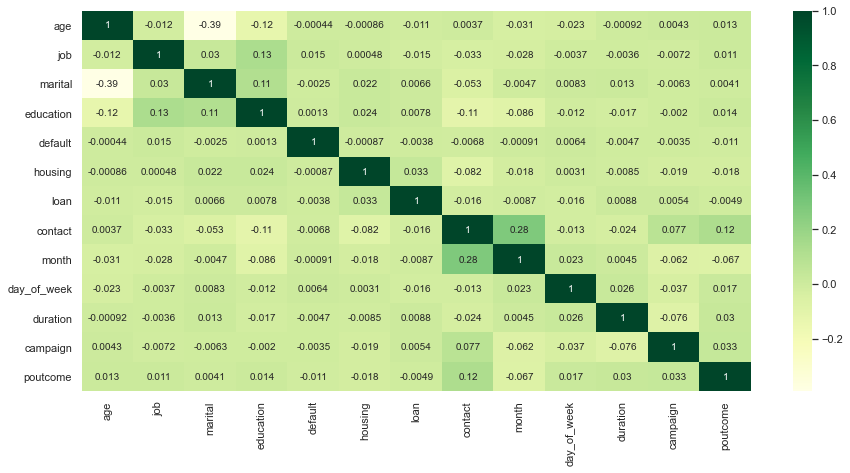

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [28]:
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

In [29]:
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8517073210375927 (0.011737513320498867)


In [30]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[-5.97723182]
[[ 0.02216523  0.01955582  0.36766692  0.09857638 -0.01293106  0.00412527
  -0.03933994 -1.3168757   0.05811146  0.01305201  0.00389794 -0.10579617
   1.15128834]]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix Training
[[21564   364]
 [ 2183   601]]
Confusion Matrix Testing
[[7171  139]
 [ 727  201]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21928
           1       0.62      0.22      0.32      2784

    accuracy                           0.90     24712
   macro avg       0.77      0.60      0.63     24712
weighted avg       0.88      0.90      0.87     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.59      0.22      0.32       928

    accuracy                           0.89      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [32]:
from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

ROC AUC Train = 0.8526339598351135
Gini Train = 0.705267919670227
ROC AUC Test = 0.8560284388414549
Gini Test = 0.7120568776829097


### Run a Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [34]:
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

In [35]:
print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8736024681892741 (0.009728559627252527)


In [36]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=0.5, n_estimators=50, random_state=0)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix Training
[[16587  5341]
 [  432  2352]]
Confusion Matrix Testing
[[5508 1802]
 [ 145  783]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     21928
           1       0.31      0.84      0.45      2784

    accuracy                           0.77     24712
   macro avg       0.64      0.80      0.65     24712
weighted avg       0.90      0.77      0.81     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      7310
           1       0.30      0.84      0.45       928

    accuracy                           0.76      8238
   macro avg       0.64      0.80      0.65      8238
weighted avg       0.90      0.76      0.80      8238



In [38]:
from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

ROC AUC Train = 0.878388137496488
Gini Train = 0.7567762749929761
ROC AUC Test = 0.87707461142035
Gini Test = 0.7541492228407001


## Case Two - Inter Quartile Range

In [39]:
df = df_original_before_od.copy()

### Splitting Data

In [40]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [42]:
def remove_outlier_IQR(X_train,X_test,col):
    Q1=X_train[col].quantile(0.25)
    Q3=X_train[col].quantile(0.75)
    IQR=Q3-Q1
    X_train[col] = X_train[col].apply(lambda x: np.nan if x <(Q1-1.5*IQR) or x > (Q3+1.5*IQR) else x)
    X_test[col] = X_test[col].apply(lambda x: np.nan if x <(Q1-1.5*IQR) or x > (Q3+1.5*IQR) else x)
    return X_train,X_test

age

 Before Outlier Removal


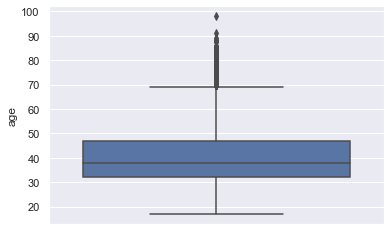

removing outliers

 After Outlier Removal


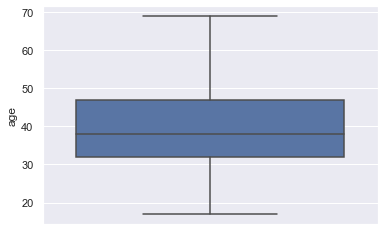

duration

 Before Outlier Removal


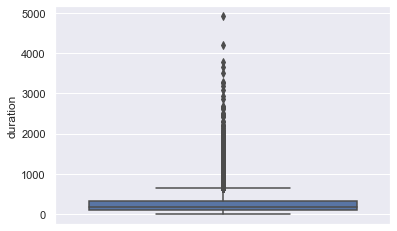

removing outliers

 After Outlier Removal


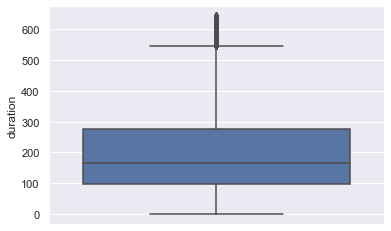

campaign

 Before Outlier Removal


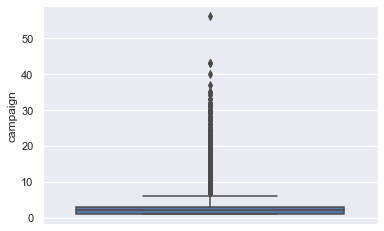

removing outliers

 After Outlier Removal


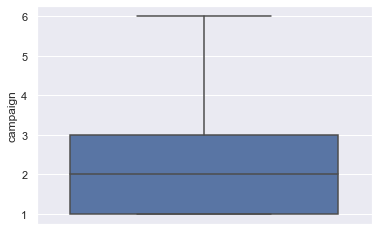

In [43]:
for col in num_variables:
    print(col)
    print('\n Before Outlier Removal')
    sns.boxplot(y=col,data=X_train)
    plt.xticks(rotation=90)
    plt.ylabel(f'{col}')
    plt.show()
    print('removing outliers')
    X_train,X_test = remove_outlier_IQR(X_train,X_test,col)
    print('\n After Outlier Removal')
    sns.boxplot(y=col,data=X_train)
    plt.xticks(rotation=90)
    plt.ylabel(f'{col}')
    plt.show()

In [44]:
# Removing missing values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.isnull())[0]
X_train = X_train.dropna().copy()
y_train.drop(null_index,inplace=True)
print(X_train.isnull().sum())
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.isnull())[0]
X_test = X_test.dropna().copy()
y_test.drop(null_index,inplace=True)
print(X_test.isnull().sum())
print(X_test.shape)
print(y_test.shape)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64
(21325, 13)
(21325,)
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64
(7121, 13)
(7121,)


### Handling Categorical Variables

In [45]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

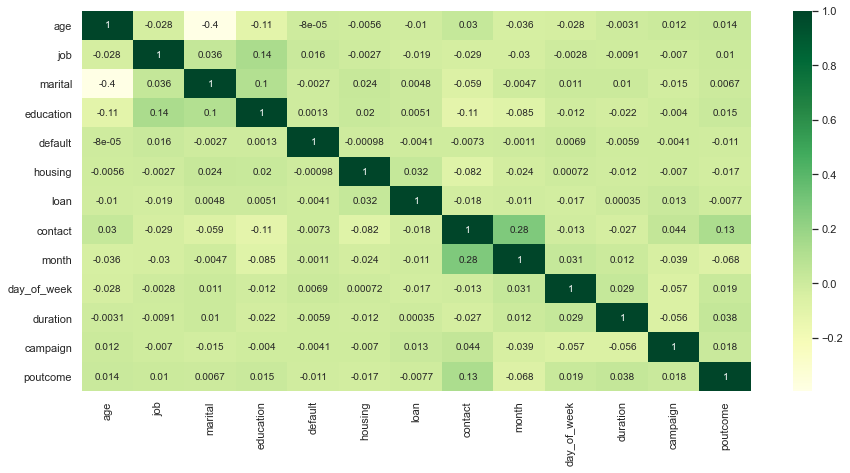

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8233268768975105 (0.015857772062949062)


In [48]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-6.61022076]
[[ 1.15558740e-02  2.04226215e-02  3.88618515e-01  1.49535130e-01
  -9.39898784e-03  1.26864338e-03 -8.72458497e-03 -1.55190558e+00
   6.58034189e-02  3.31240963e-03  6.12943770e-03 -1.21014879e-01
   1.33126707e+00]]
Confusion Matrix Training
[[19402   173]
 [ 1559   191]]
Confusion Matrix Testing
[[6496   55]
 [ 495   75]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19575
           1       0.52      0.11      0.18      1750

    accuracy                           0.92     21325
   macro avg       0.73      0.55      0.57     21325
weighted avg       0.89      0.92      0.89     21325

Classification Report Testing
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6551
           1       0.58      0.13      0.21       570

    accuracy                           0.92      7121
   macro avg       0.75      0.56      0.59      7121

### Run a Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.859037937823823 (0.012357875251171404)


In [50]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[14974  4601]
 [  365  1385]]
Confusion Matrix Testing
[[4995 1556]
 [ 123  447]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     19575
           1       0.23      0.79      0.36      1750

    accuracy                           0.77     21325
   macro avg       0.60      0.78      0.61     21325
weighted avg       0.92      0.77      0.82     21325

Classification Report Testing
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      6551
           1       0.22      0.78      0.35       570

    accuracy                           0.76      7121
   macro avg       0.60      0.77      0.60      7121
weighted avg       0.92      0.76      0.82      7121

ROC AUC Train = 0.8640353804050356
Gini Train = 0.7280707608100712
ROC AUC Test = 0.8615308497162614
Gini Test = 0.7230616994325227


## Case Three - Angle Based Object Detection

In [51]:
df = df_original_before_od.copy()

### Splitting Data

In [52]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [53]:
from pyod.models.abod import ABOD

In [54]:
outlier_fraction = 0.01
for col in num_variables:
    print(col)
    clf = ABOD(contamination=outlier_fraction)
    clf.fit(X_train[col].astype(float).values.reshape(-1,1))
    outliers = clf.predict(X_train[col].astype(float).values.reshape(-1,1))
    X_train[f'{col}_outliers'] = outliers
    outliers = clf.predict(X_test[col].astype(float).values.reshape(-1,1))
    X_test[f'{col}_outliers'] = outliers
    scores_pred = clf.decision_function(X_train[col].astype(float).values.reshape(-1,1))*-1
    print(scores_pred)

age
[nan nan nan ... nan nan nan]
duration
[nan nan nan ... nan nan nan]
campaign
[nan nan nan ... nan nan nan]


In [55]:
# Removing missing values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
outlier_col = [x+'_outliers' for x in num_variables]
X_train['outlier'] = X_train[outlier_col].sum(axis=1)
null_index = np.where(X_train.outlier>0)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
X_test['outlier'] = X_test[outlier_col].sum(axis=1)
null_index = np.where(X_test.outlier>0)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24712, 17)
(24712,)
(8238, 17)
(8238,)


### Handling Categorical Variables

In [56]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

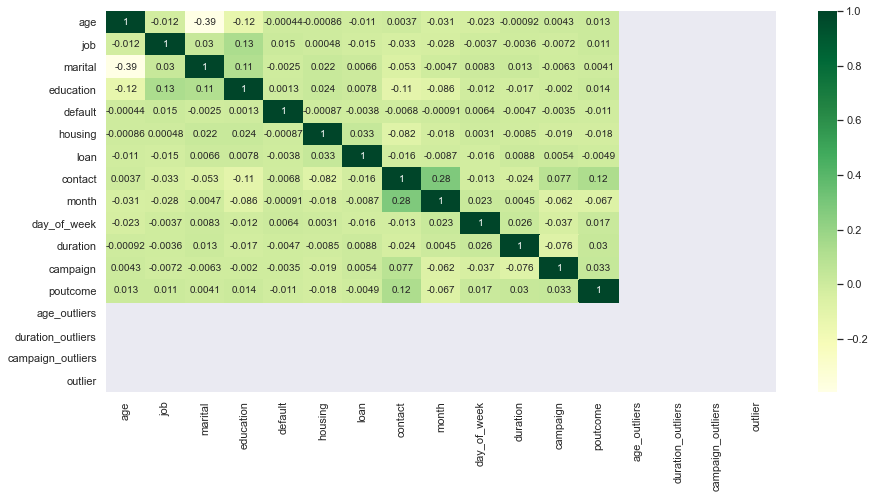

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [58]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.851816511571404 (0.011663557806257736)


In [59]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-5.93642321]
[[ 0.02180219  0.01934572  0.36331096  0.09761603 -0.00996494 -0.00206258
  -0.03783247 -1.3191885   0.05750027  0.01176387  0.00389319 -0.10668627
   1.14863454  0.          0.          0.          0.        ]]
Confusion Matrix Training
[[21565   363]
 [ 2185   599]]
Confusion Matrix Testing
[[7172  138]
 [ 728  200]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21928
           1       0.62      0.22      0.32      2784

    accuracy                           0.90     24712
   macro avg       0.77      0.60      0.63     24712
weighted avg       0.88      0.90      0.87     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.59      0.22      0.32       928

    accuracy                           0.89      8238
   macro avg       0.75      0.60      0.63      8238
weigh

### Run a Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8756596476249523 (0.009771834622419933)


In [61]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16691  5237]
 [  440  2344]]
Confusion Matrix Testing
[[5541 1769]
 [ 149  779]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     21928
           1       0.31      0.84      0.45      2784

    accuracy                           0.77     24712
   macro avg       0.64      0.80      0.65     24712
weighted avg       0.90      0.77      0.81     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7310
           1       0.31      0.84      0.45       928

    accuracy                           0.77      8238
   macro avg       0.64      0.80      0.65      8238
weighted avg       0.90      0.77      0.81      8238

ROC AUC Train = 0.8773687682022041
Gini Train = 0.7547375364044082
ROC AUC Test = 0.8764999233454408
Gini Test = 0.7529998466908816


## Case Four - Density Based Spatial Clustering of Applications With Noise

In [62]:
df = df_original_before_od.copy()

### Splitting Data

In [63]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [64]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.01, min_samples = 100).fit(X_train[num_variables])
X_train['outlier'] = model.labels_
model = DBSCAN(eps = 0.01, min_samples = 100).fit(X_test[num_variables])
X_test['outlier'] = model.labels_
# colors = model.labels_
# plt.scatter(X_train['age'], X_train['duration'], c = colors)

In [65]:
# Removing Outliers values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.outlier>0)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.outlier>0)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24712, 14)
(24712,)
(8238, 14)
(8238,)


### Handling Categorical Variables

In [66]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

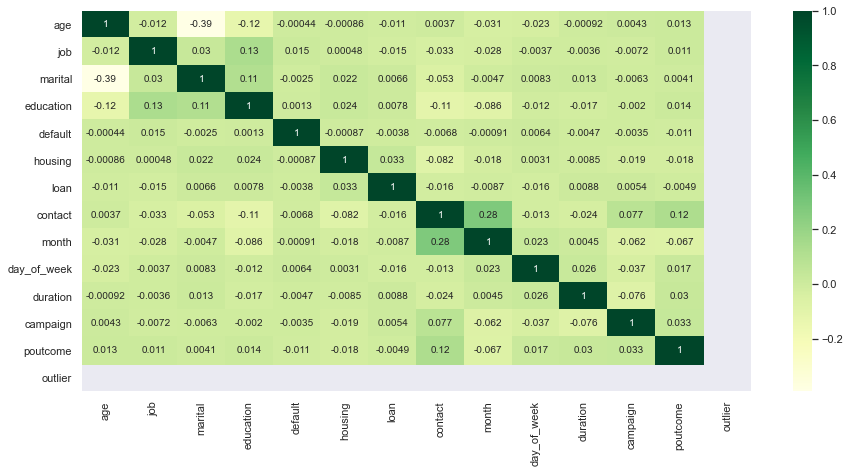

In [67]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8516963705047752 (0.011767686471650014)


In [69]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

[-2.99496922]
[[ 0.02227141  0.01959323  0.36842769  0.09875529 -0.00789279  0.00597327
  -0.03668572 -1.31751067  0.05822149  0.01316649  0.0039002  -0.10610155
   1.15530611  2.99496922]]
Confusion Matrix Training
[[21564   364]
 [ 2182   602]]
Confusion Matrix Testing
[[7170  140]
 [ 727  201]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21928
           1       0.62      0.22      0.32      2784

    accuracy                           0.90     24712
   macro avg       0.77      0.60      0.63     24712
weighted avg       0.88      0.90      0.87     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.59      0.22      0.32       928

    accuracy                           0.89      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.89      0.

In [70]:
from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

ROC AUC Train = 0.8525611477426644
Gini Train = 0.7051222954853289
ROC AUC Test = 0.8559597445634227
Gini Test = 0.7119194891268454


### Run a Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8637820399753763 (0.010017614903258405)


In [72]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16119  5809]
 [  446  2338]]
Confusion Matrix Testing
[[5370 1940]
 [ 158  770]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     21928
           1       0.29      0.84      0.43      2784

    accuracy                           0.75     24712
   macro avg       0.63      0.79      0.63     24712
weighted avg       0.90      0.75      0.79     24712

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.73      0.84      7310
           1       0.28      0.83      0.42       928

    accuracy                           0.75      8238
   macro avg       0.63      0.78      0.63      8238
weighted avg       0.89      0.75      0.79      8238

ROC AUC Train = 0.867678527060348
Gini Train = 0.735357054120696
ROC AUC Test = 0.8659392099863201
Gini Test = 0.7318784199726402


## Case Five - Isolation Forest

In [73]:
df = df_original_before_od.copy()

### Splitting Data

In [74]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [75]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01),
                      max_features=1.0,bootstrap=True)
model.fit(X_train[num_variables])
# X_train['scores'] = model.decision_function(X_train[num_variables])
X_train['outlier'] = model.predict(X_train[num_variables])
X_test['outlier'] = model.predict(X_test[num_variables])

In [76]:
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    24464
-1      248
Name: outlier, dtype: int64
 1    8166
-1      72
Name: outlier, dtype: int64


In [77]:
# Removing Outliers values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.outlier==-1)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.outlier==-1)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24464, 14)
(24464,)
(8166, 14)
(8166,)


In [78]:
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

### Handling Categorical Variables

In [79]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

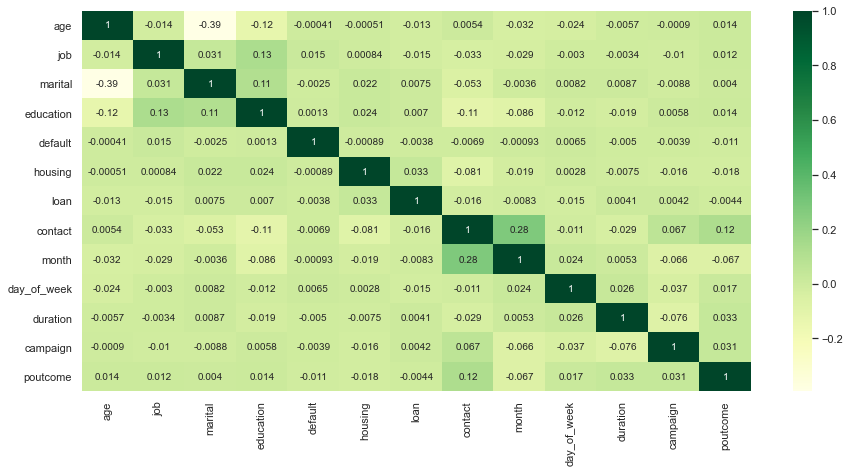

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.852152102431818 (0.011556816145696236)


In [82]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-6.18621644]
[[ 0.02285015  0.02080477  0.37785404  0.10300364 -0.01027681  0.01216014
  -0.0085631  -1.32775164  0.05866747  0.01466094  0.00429331 -0.11036723
   1.16135546]]
Confusion Matrix Training
[[21342   395]
 [ 2101   626]]
Confusion Matrix Testing
[[7114  143]
 [ 707  202]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21737
           1       0.61      0.23      0.33      2727

    accuracy                           0.90     24464
   macro avg       0.76      0.61      0.64     24464
weighted avg       0.88      0.90      0.88     24464

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7257
           1       0.59      0.22      0.32       909

    accuracy                           0.90      8166
   macro avg       0.75      0.60      0.63      8166
weighted avg       0.87      0.90      0.87      8166

### Run a Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8739041115108527 (0.011368632578384243)


In [84]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16559  5178]
 [  426  2301]]
Confusion Matrix Testing
[[5507 1750]
 [ 146  763]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.76      0.86     21737
           1       0.31      0.84      0.45      2727

    accuracy                           0.77     24464
   macro avg       0.64      0.80      0.65     24464
weighted avg       0.90      0.77      0.81     24464

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7257
           1       0.30      0.84      0.45       909

    accuracy                           0.77      8166
   macro avg       0.64      0.80      0.65      8166
weighted avg       0.90      0.77      0.81      8166

ROC AUC Train = 0.8795543936169699
Gini Train = 0.7591087872339397
ROC AUC Test = 0.8806797518666019
Gini Test = 0.7613595037332037


## Case Six - One Class SVM

In [85]:
df = df_original_before_od.copy()

### Splitting Data

In [86]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [87]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.01,gamma=0.001)
ocsvm.fit(X_train[num_variables])
X_train['outlier'] = ocsvm.predict(X_train[num_variables])
X_test['outlier'] = ocsvm.predict(X_test[num_variables])

In [88]:
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    24432
-1      280
Name: outlier, dtype: int64
 1    8109
-1     129
Name: outlier, dtype: int64


In [89]:
# Removing Outliers values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.outlier==-1)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.outlier==-1)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24432, 14)
(24432,)
(8109, 14)
(8109,)


In [90]:
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

### Handling Categorical Variables

In [91]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

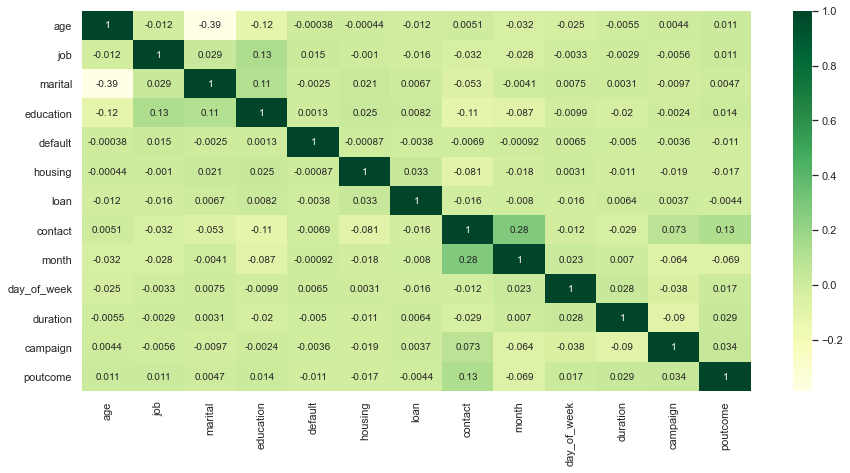

In [92]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8505324059745138 (0.009651471149784445)


In [94]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-6.07843381]
[[ 0.0208027   0.01799313  0.36406729  0.10754404 -0.00908553  0.01780256
  -0.0282561  -1.33963241  0.06062819  0.01004144  0.00427501 -0.11308205
   1.15123709]]
Confusion Matrix Training
[[21403   379]
 [ 2082   568]]
Confusion Matrix Testing
[[7110  133]
 [ 691  175]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     21782
           1       0.60      0.21      0.32      2650

    accuracy                           0.90     24432
   macro avg       0.76      0.60      0.63     24432
weighted avg       0.88      0.90      0.88     24432

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7243
           1       0.57      0.20      0.30       866

    accuracy                           0.90      8109
   macro avg       0.74      0.59      0.62      8109
weighted avg       0.87      0.90      0.88      8109

### Run a Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8718106051945753 (0.008734108709658343)


In [96]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16708  5074]
 [  432  2218]]
Confusion Matrix Testing
[[5530 1713]
 [ 141  725]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     21782
           1       0.30      0.84      0.45      2650

    accuracy                           0.77     24432
   macro avg       0.64      0.80      0.65     24432
weighted avg       0.90      0.77      0.81     24432

Classification Report Testing
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7243
           1       0.30      0.84      0.44       866

    accuracy                           0.77      8109
   macro avg       0.64      0.80      0.65      8109
weighted avg       0.90      0.77      0.81      8109

ROC AUC Train = 0.8755166114309375
Gini Train = 0.751033222861875
ROC AUC Test = 0.8761786087004766
Gini Test = 0.7523572174009532


## Case Seven - Local Outlier Factor

In [97]:
df = df_original_before_od.copy()

### Splitting Data

In [98]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [99]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)
clf.fit(X_train[num_variables])
X_train['outlier'] = clf.predict(X_train[num_variables])
X_test['outlier'] = clf.predict(X_test[num_variables])

In [100]:
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    24509
-1      203
Name: outlier, dtype: int64
 1    8152
-1      86
Name: outlier, dtype: int64


In [101]:
# Removing Outliers values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.outlier==-1)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.outlier==-1)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24509, 14)
(24509,)
(8152, 14)
(8152,)


In [102]:
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

### Handling Categorical Variables

In [103]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

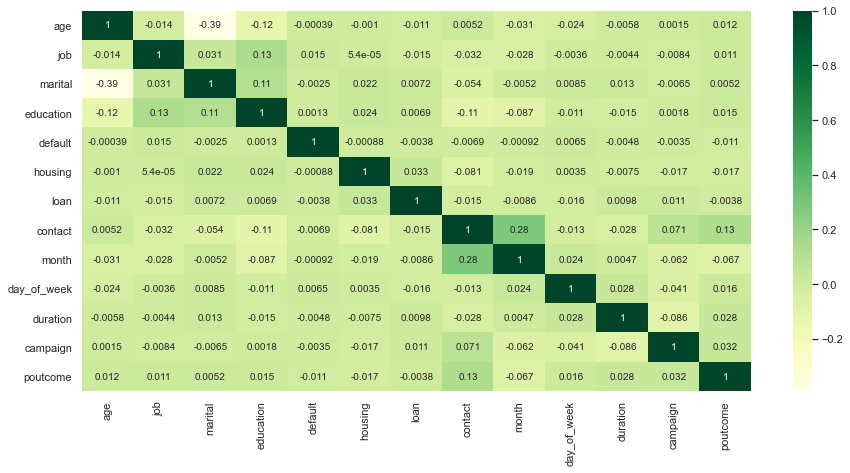

In [104]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8516553799147661 (0.010803310172923604)


In [106]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-5.89931521]
[[ 2.00859245e-02  1.88723533e-02  3.54344695e-01  1.00735455e-01
  -1.03888048e-02 -1.02569241e-04 -3.65768366e-02 -1.31936870e+00
   5.93032092e-02  9.26949404e-03  3.95520281e-03 -1.14344146e-01
   1.16422542e+00]]
Confusion Matrix Training
[[21398   361]
 [ 2150   600]]
Confusion Matrix Testing
[[7100  138]
 [ 721  193]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21759
           1       0.62      0.22      0.32      2750

    accuracy                           0.90     24509
   macro avg       0.77      0.60      0.63     24509
weighted avg       0.88      0.90      0.87     24509

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7238
           1       0.58      0.21      0.31       914

    accuracy                           0.89      8152
   macro avg       0.75      0.60      0.63      8152

### Run a Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8727315832641833 (0.011204712226199046)


In [108]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16475  5284]
 [  418  2332]]
Confusion Matrix Testing
[[5454 1784]
 [ 143  771]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.98      0.76      0.85     21759
           1       0.31      0.85      0.45      2750

    accuracy                           0.77     24509
   macro avg       0.64      0.80      0.65     24509
weighted avg       0.90      0.77      0.81     24509

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      7238
           1       0.30      0.84      0.44       914

    accuracy                           0.76      8152
   macro avg       0.64      0.80      0.65      8152
weighted avg       0.90      0.76      0.80      8152

ROC AUC Train = 0.8802751546904312
Gini Train = 0.7605503093808623
ROC AUC Test = 0.8784785562219335
Gini Test = 0.756957112443867


## Case Eight - Minimum Covariance Determinant

In [109]:
df = df_original_before_od.copy()

### Splitting Data

In [110]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(24712, 13)
(8238, 13)
(24712,)
(8238,)
no     0.887342
yes    0.112658
Name: y, dtype: float64
no     0.887351
yes    0.112649
Name: y, dtype: float64


### Outlier Handling

In [111]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)
ee.fit(X_train[num_variables])
X_train['outlier'] = ee.predict(X_train[num_variables])
X_test['outlier'] = ee.predict(X_test[num_variables])

In [112]:
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    24464
-1      248
Name: outlier, dtype: int64
 1    8164
-1      74
Name: outlier, dtype: int64


In [113]:
# Removing Outliers values
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
null_index = np.where(X_train.outlier==-1)[0]
X_train.drop(null_index,inplace=True)
y_train.drop(null_index,inplace=True)
print(X_train.shape)
print(y_train.shape)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
null_index = np.where(X_test.outlier==-1)[0]
X_test.drop(null_index,inplace=True)
y_test.drop(null_index,inplace=True)
print(X_test.shape)
print(y_test.shape)

(24464, 14)
(24464,)
(8164, 14)
(8164,)


In [114]:
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

### Handling Categorical Variables

In [115]:
from sklearn.preprocessing import LabelEncoder
lcoder1 = LabelEncoder()
for col in cat_variables:
    if col != target:
        X_train.loc[:,col]= lcoder1.fit_transform(X_train[col])
        X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
lcoder2 = LabelEncoder()
y_train= lcoder2.fit_transform(y_train)
y_test= lcoder2.transform(y_test)

<AxesSubplot:>

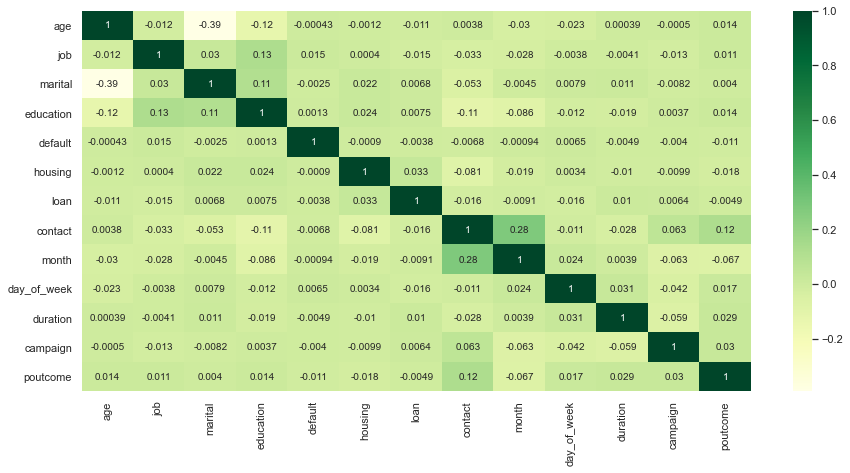

In [116]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGn')

### Run a Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.8517385714502266 (0.013080627103968782)


In [118]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[-6.04447856]
[[ 0.02246273  0.02015956  0.37212577  0.09990485 -0.0121562   0.00742477
  -0.04543873 -1.33864363  0.05881889  0.0100074   0.00405347 -0.11507579
   1.16240241]]
Confusion Matrix Training
[[21313   381]
 [ 2144   626]]
Confusion Matrix Testing
[[7093  145]
 [ 719  207]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21694
           1       0.62      0.23      0.33      2770

    accuracy                           0.90     24464
   macro avg       0.77      0.60      0.64     24464
weighted avg       0.88      0.90      0.87     24464

Classification Report Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7238
           1       0.59      0.22      0.32       926

    accuracy                           0.89      8164
   macro avg       0.75      0.60      0.63      8164
weighted avg       0.87      0.89      0.87      8164

### Run a Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.8738007332501735 (0.009276356201802977)


In [120]:
model.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

from sklearn.metrics import roc_auc_score
pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[16142  5552]
 [  433  2337]]
Confusion Matrix Testing
[[5354 1884]
 [ 141  785]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     21694
           1       0.30      0.84      0.44      2770

    accuracy                           0.76     24464
   macro avg       0.64      0.79      0.64     24464
weighted avg       0.90      0.76      0.80     24464

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      7238
           1       0.29      0.85      0.44       926

    accuracy                           0.75      8164
   macro avg       0.63      0.79      0.64      8164
weighted avg       0.90      0.75      0.80      8164

ROC AUC Train = 0.8726658771045513
Gini Train = 0.7453317542091027
ROC AUC Test = 0.8720032322807931
Gini Test = 0.7440064645615863
